In [ ]:
import pandas as pd
import warnings

import numpy as np
import re

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import plotly.express as px
from sklearn.cluster import KMeans

In [ ]:
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

In [ ]:
df = pd.read_csv("2-wheeler-EV-bikewale.csv")

In [ ]:
df.head(5)

,review,Used it for,Owned for,Ridden for,rating,Visual Appeal,Reliability,Performance,Service Experience,Extra Features,Comfort,Maintenance cost,Value for Money,Model Name
0,We all checked the bike's capacity to be 150 k...,Daily Commute,Never owned,NaN,1,3.0,4.0,NaN,NaN,NaN,4.0,NaN,1.0,TVS iQube
1,Performance is very poor on this bike. The cha...,Everything,> 1 yr,< 5000 kms,1,3.0,1.0,NaN,1.0,NaN,3.0,NaN,3.0,TVS iQube
2,I purchased this in April 2022 and the sales s...,Daily Commute,< 3 months,< 5000 kms,3,4.0,4.0,NaN,2.0,NaN,5.0,NaN,2.0,TVS iQube
3,If any issues come in scooty parts not availab...,Daily Commute,6 months-1 yr,5000-10000 kms,1,1.0,1.0,NaN,1.0,NaN,1.0,NaN,1.0,TVS iQube
4,Don't buy this vehicle unless you have a near ...,Daily Commute,6 months-1 yr,< 5000 kms,1,3.0,4.0,NaN,1.0,NaN,3.0,NaN,2.0,TVS iQube


In [ ]:
df = df.drop(columns ='Model Name')

In [ ]:
df.drop_duplicates(inplace=True)
df.reset_index(drop=True, inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 840 entries, 0 to 839
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   review              797 non-null    object 
 1   Used it for         840 non-null    object 
 2   Owned for           840 non-null    object 
 3   Ridden for          665 non-null    object 
 4   rating              840 non-null    int64  
 5   Visual Appeal       735 non-null    float64
 6   Reliability         712 non-null    float64
 7   Performance         345 non-null    float64
 8   Service Experience  699 non-null    float64
 9   Extra Features      185 non-null    float64
 10  Comfort             526 non-null    float64
 11  Maintenance cost    180 non-null    float64
 12  Value for Money     386 non-null    float64
dtypes: float64(8), int64(1), object(4)
memory usage: 85.4+ KB


In [ ]:
for col in df.columns[1:].values:
    print(col,'\n\n' ,df[col].value_counts(), '\n\n\n')

Used it for 

 Daily Commute         597
Everything            159
Occasional Commute     56
Leisure Rides          20
Tours                   8
Name: Used it for, dtype: int64 



Owned for 

 < 3 months            217
> 1 yr                203
Never owned           174
6 months-1 yr         134
3-6 months            111
Occasional Commute      1
Name: Owned for, dtype: int64 



Ridden for 

 < 5000 kms         456
5000-10000 kms     138
> 15000 kms         38
10000-15000 kms     32
Never owned          1
Name: Ridden for, dtype: int64 



rating 

 5    337
1    239
4    151
3     65
2     48
Name: rating, dtype: int64 



Visual Appeal 

 5.0    293
4.0    203
3.0    109
1.0     91
2.0     39
Name: Visual Appeal, dtype: int64 



Reliability 

 5.0    233
1.0    177
4.0    158
3.0     91
2.0     53
Name: Reliability, dtype: int64 



Performance 

 5.0    126
4.0     85
1.0     67
3.0     46
2.0     21
Name: Performance, dtype: int64 



Service Experience 

 5.0    213
1.0    211


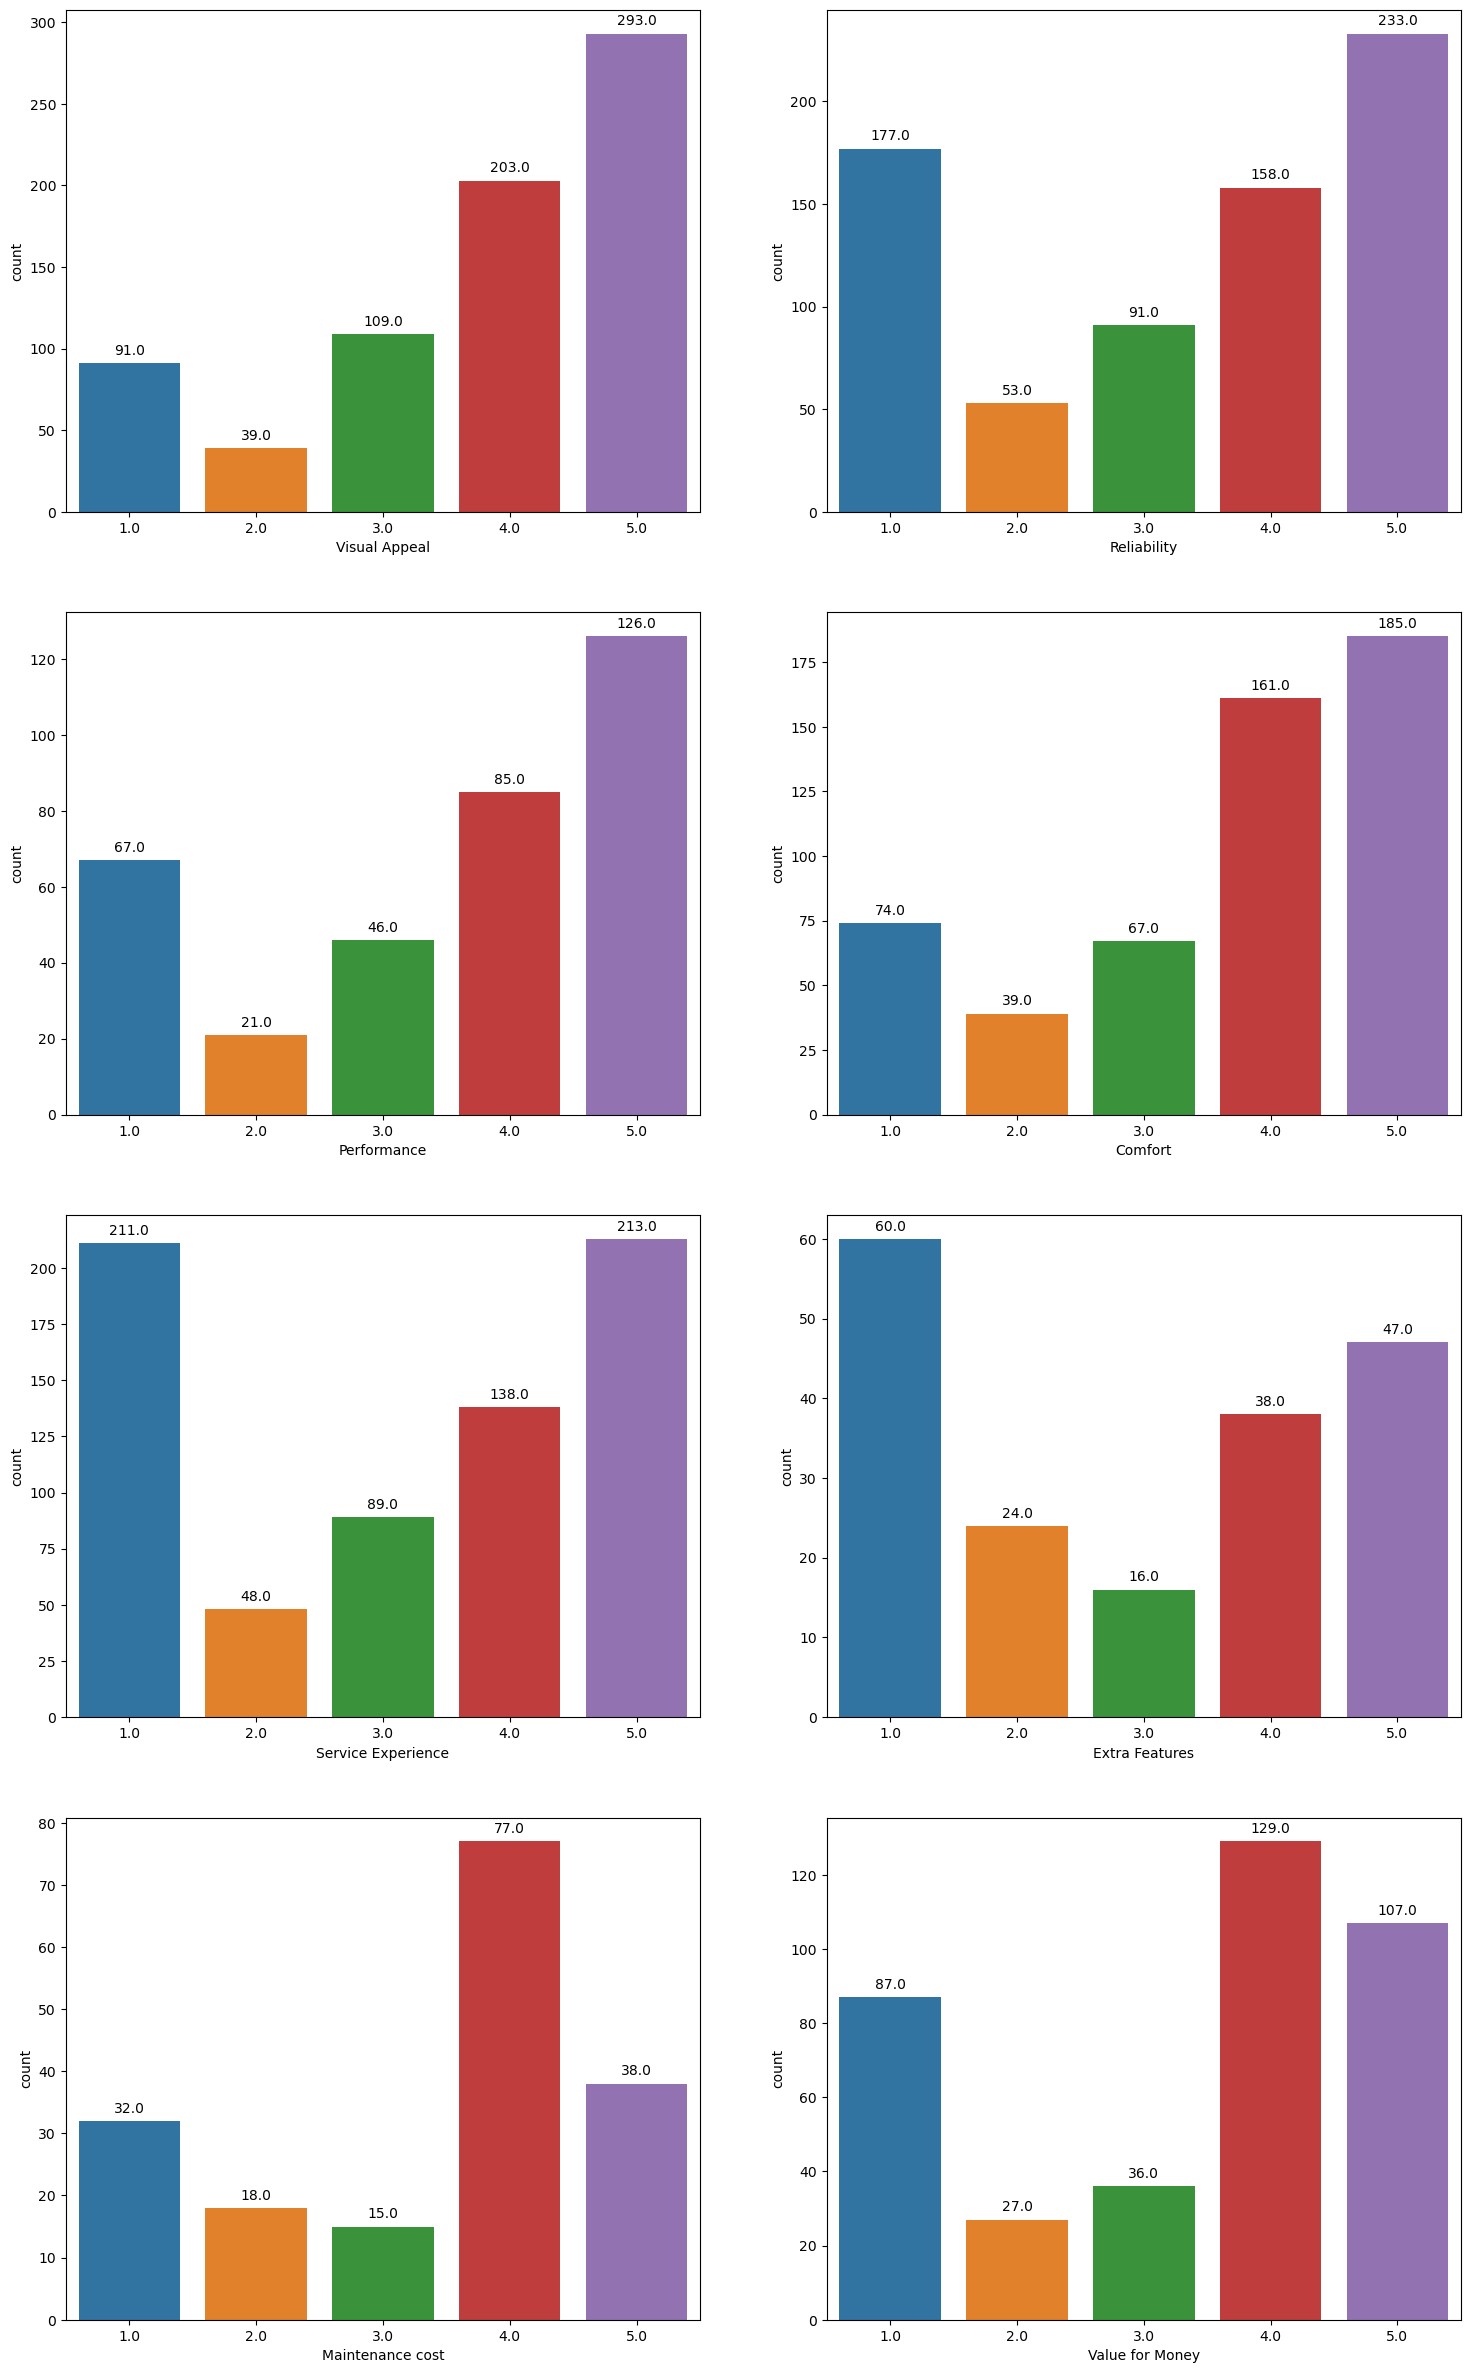

In [ ]:
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(18, 30))

splot = sns.countplot(data = df,x='Visual Appeal', ax=axes[0][0])
for p in splot.patches:
               splot.annotate(format(p.get_height(), '.1f'), 
               (p.get_x() + p.get_width() / 2., p.get_height()), 
               ha = 'center', va = 'center', 
               xytext = (0, 9), 
               textcoords = 'offset points')
        
splot = sns.countplot(data = df,x='Reliability', ax=axes[0][1])
for p in splot.patches:
               splot.annotate(format(p.get_height(), '.1f'), 
               (p.get_x() + p.get_width() / 2., p.get_height()), 
               ha = 'center', va = 'center', 
               xytext = (0, 9), 
               textcoords = 'offset points')
        
splot = sns.countplot(data = df,x='Performance', ax=axes[1][0])
for p in splot.patches:
               splot.annotate(format(p.get_height(), '.1f'), 
               (p.get_x() + p.get_width() / 2., p.get_height()), 
               ha = 'center', va = 'center', 
               xytext = (0, 9), 
               textcoords = 'offset points')
        
splot = sns.countplot(data = df,x='Comfort', ax=axes[1][1])
for p in splot.patches:
               splot.annotate(format(p.get_height(), '.1f'), 
               (p.get_x() + p.get_width() / 2., p.get_height()), 
               ha = 'center', va = 'center', 
               xytext = (0, 9), 
               textcoords = 'offset points')
        
splot = sns.countplot(data = df,x='Service Experience', ax=axes[2][0])
for p in splot.patches:
               splot.annotate(format(p.get_height(), '.1f'), 
               (p.get_x() + p.get_width() / 2., p.get_height()), 
               ha = 'center', va = 'center', 
               xytext = (0, 9), 
               textcoords = 'offset points')
        
splot = sns.countplot(data = df,x='Extra Features', ax=axes[2][1])
for p in splot.patches:
               splot.annotate(format(p.get_height(), '.1f'), 
               (p.get_x() + p.get_width() / 2., p.get_height()), 
               ha = 'center', va = 'center', 
               xytext = (0, 9), 
               textcoords = 'offset points')
        
splot = sns.countplot(data = df,x='Maintenance cost', ax=axes[3][0])
for p in splot.patches:
               splot.annotate(format(p.get_height(), '.1f'), 
               (p.get_x() + p.get_width() / 2., p.get_height()), 
               ha = 'center', va = 'center', 
               xytext = (0, 9), 
               textcoords = 'offset points')
        
splot = sns.countplot(data = df,x='Value for Money', ax=axes[3][1])
for p in splot.patches:
               splot.annotate(format(p.get_height(), '.1f'), 
               (p.get_x() + p.get_width() / 2., p.get_height()), 
               ha = 'center', va = 'center', 
               xytext = (0, 9), 
               textcoords = 'offset points')


In [ ]:
for col in df.columns[1:4].values:
    plt.figure(figsize=(10, 8))
    splot = sns.countplot(df[col])
    for p in splot.patches:
               splot.annotate(format(p.get_height(), '.1f'), 
               (p.get_x() + p.get_width() / 2., p.get_height()), 
               ha = 'center', va = 'center', 
               xytext = (0, 9), 
               textcoords = 'offset points')
    plt.show(block=False)


<AxesSubplot:xlabel='count', ylabel='Owned for'>

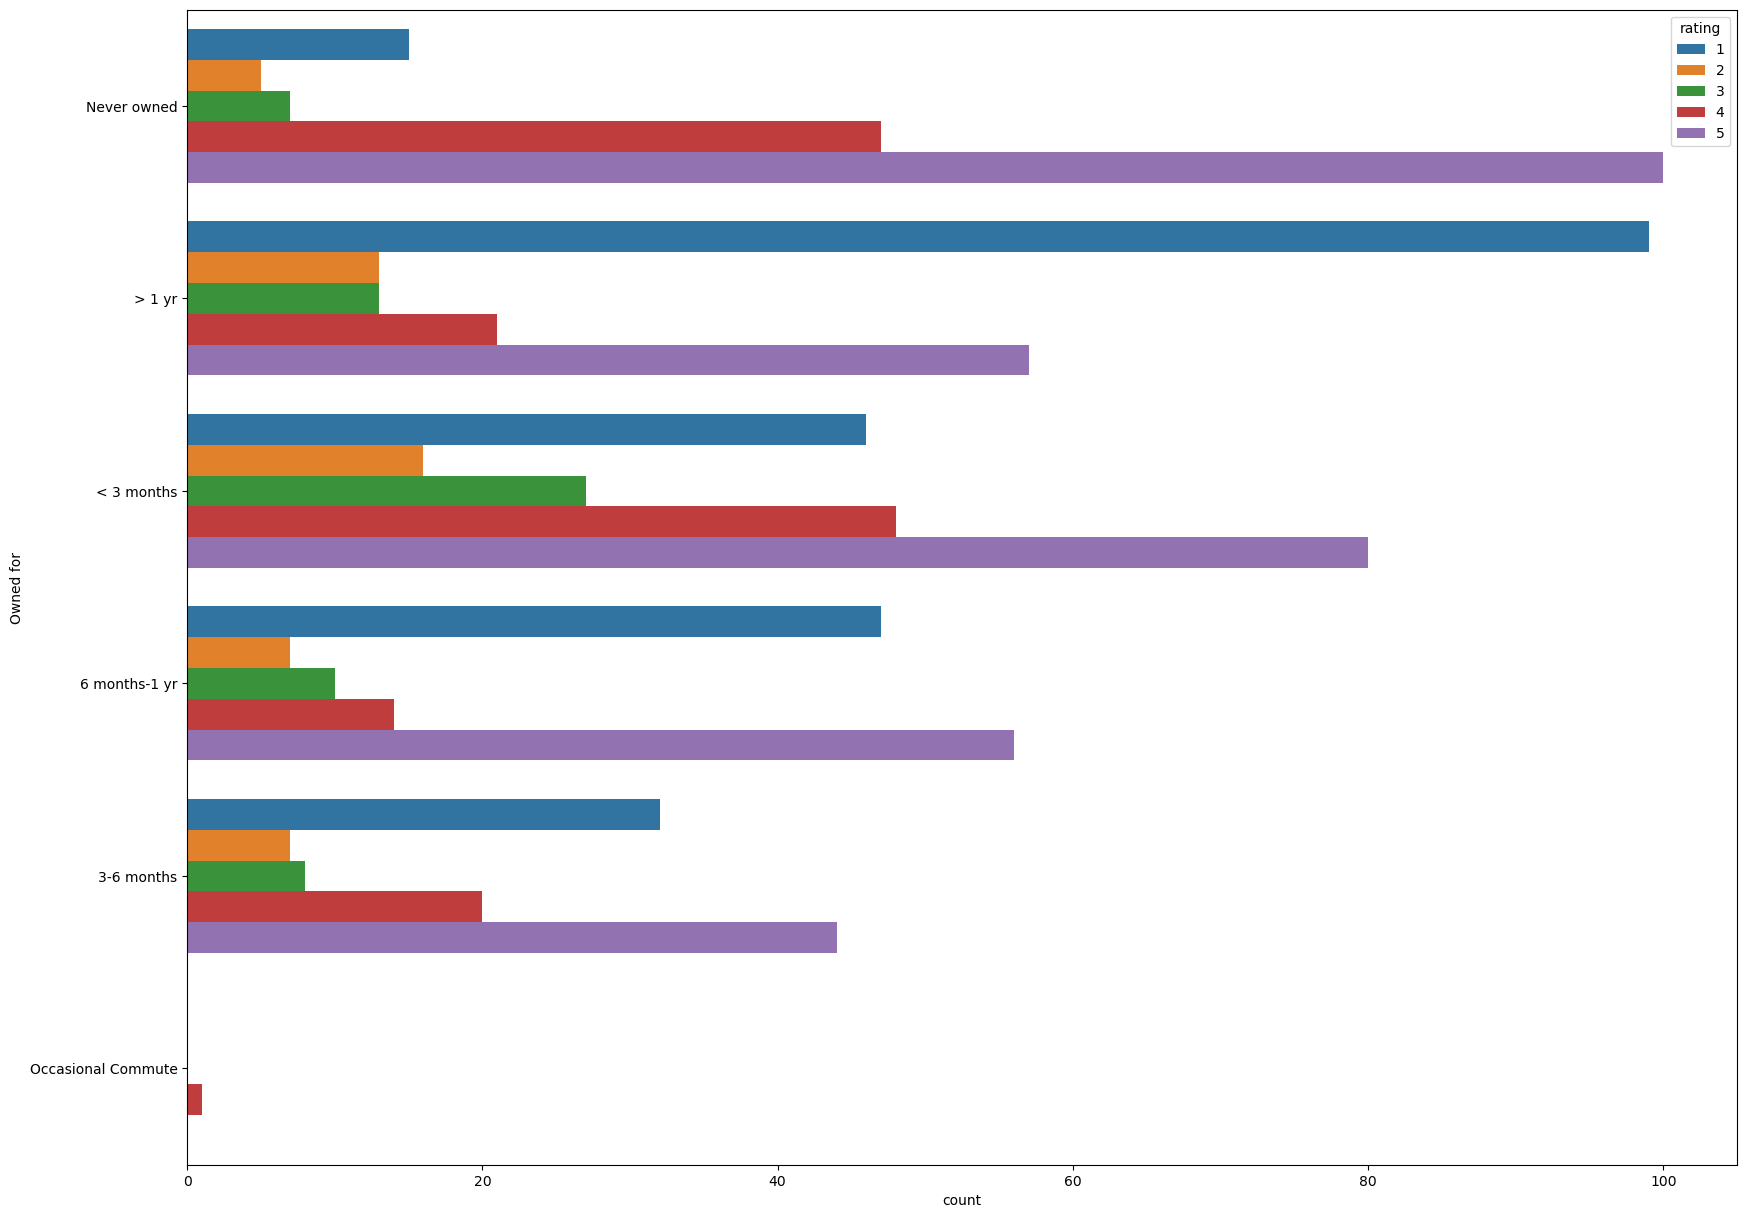

In [ ]:
plt.figure(figsize=(20, 15))
sns.countplot(y ='Owned for', data = df, hue='rating')

<AxesSubplot:xlabel='count', ylabel='Used it for'>

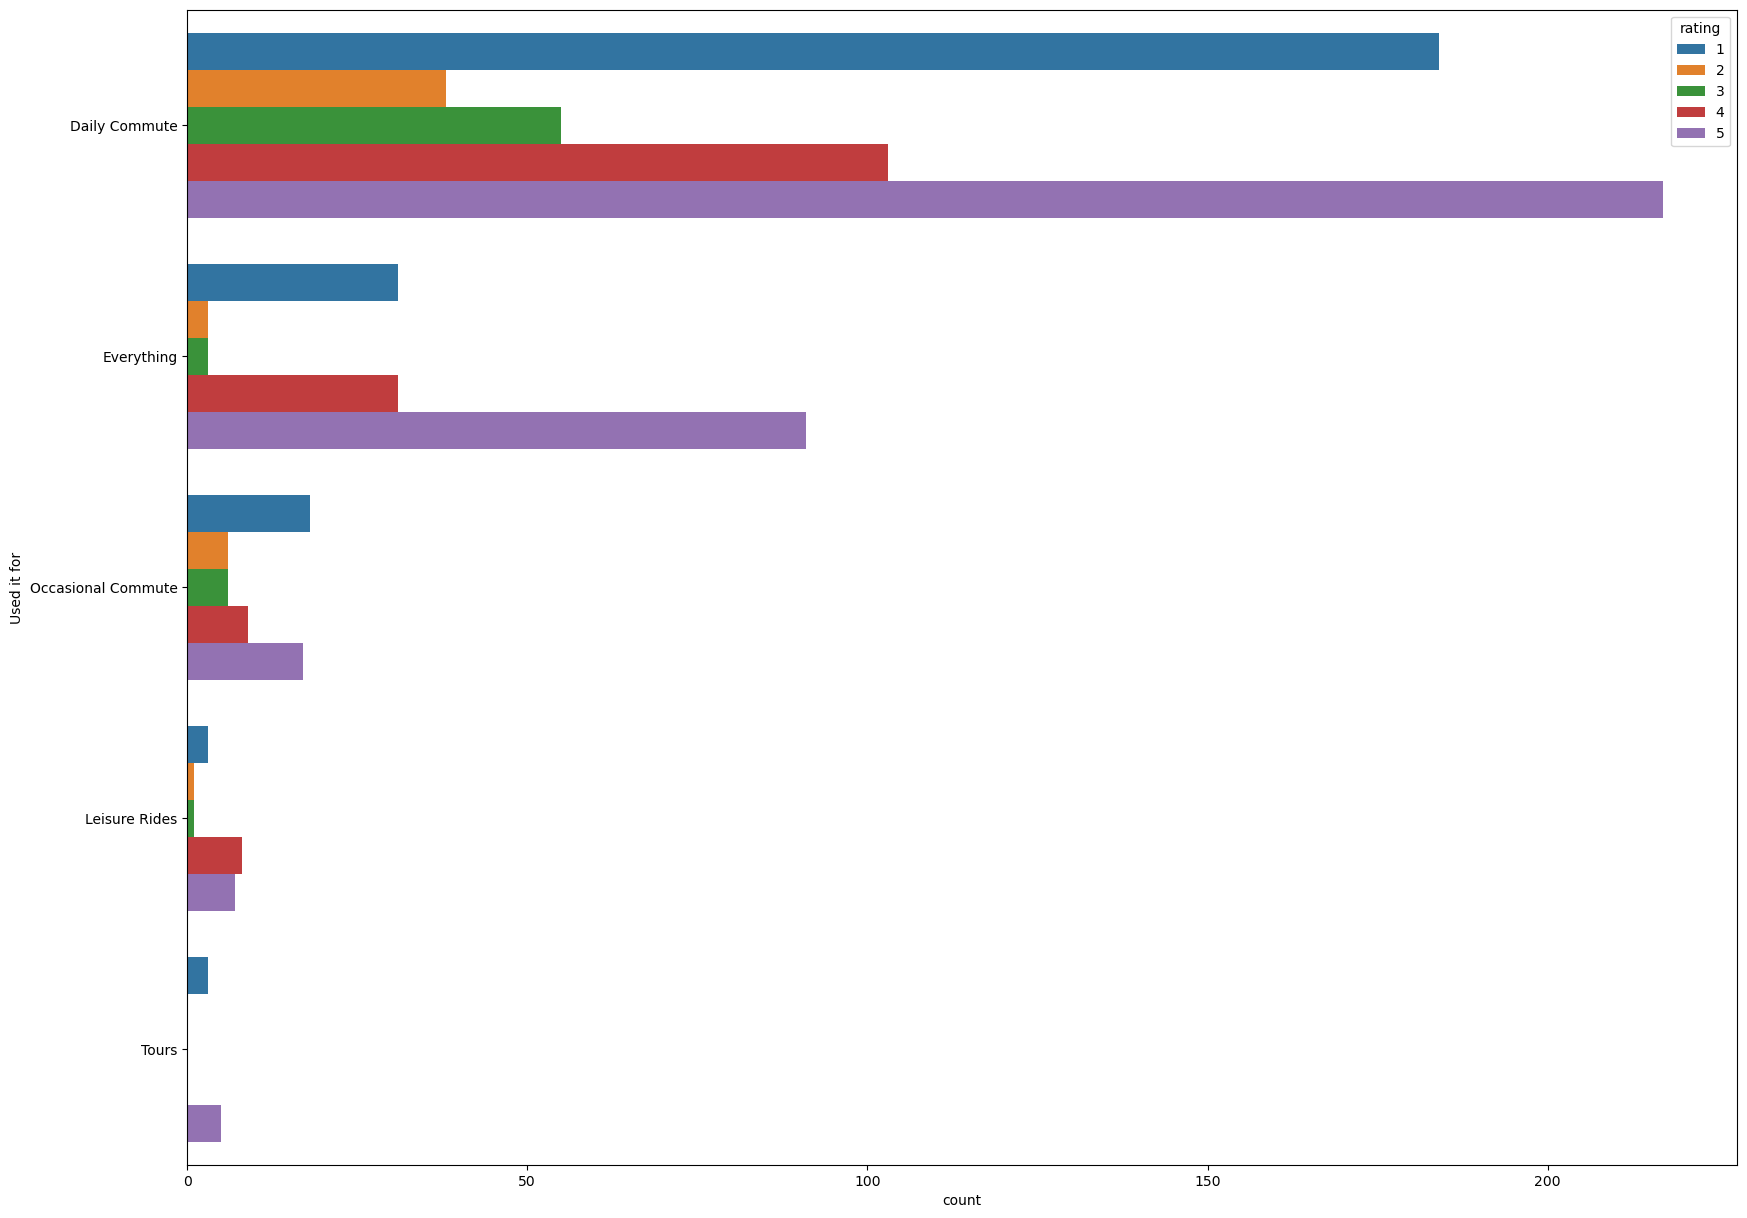

In [ ]:
plt.figure(figsize=(20, 15))
sns.countplot(y ='Used it for', data = df, hue='rating')

<AxesSubplot:xlabel='count', ylabel='Ridden for'>

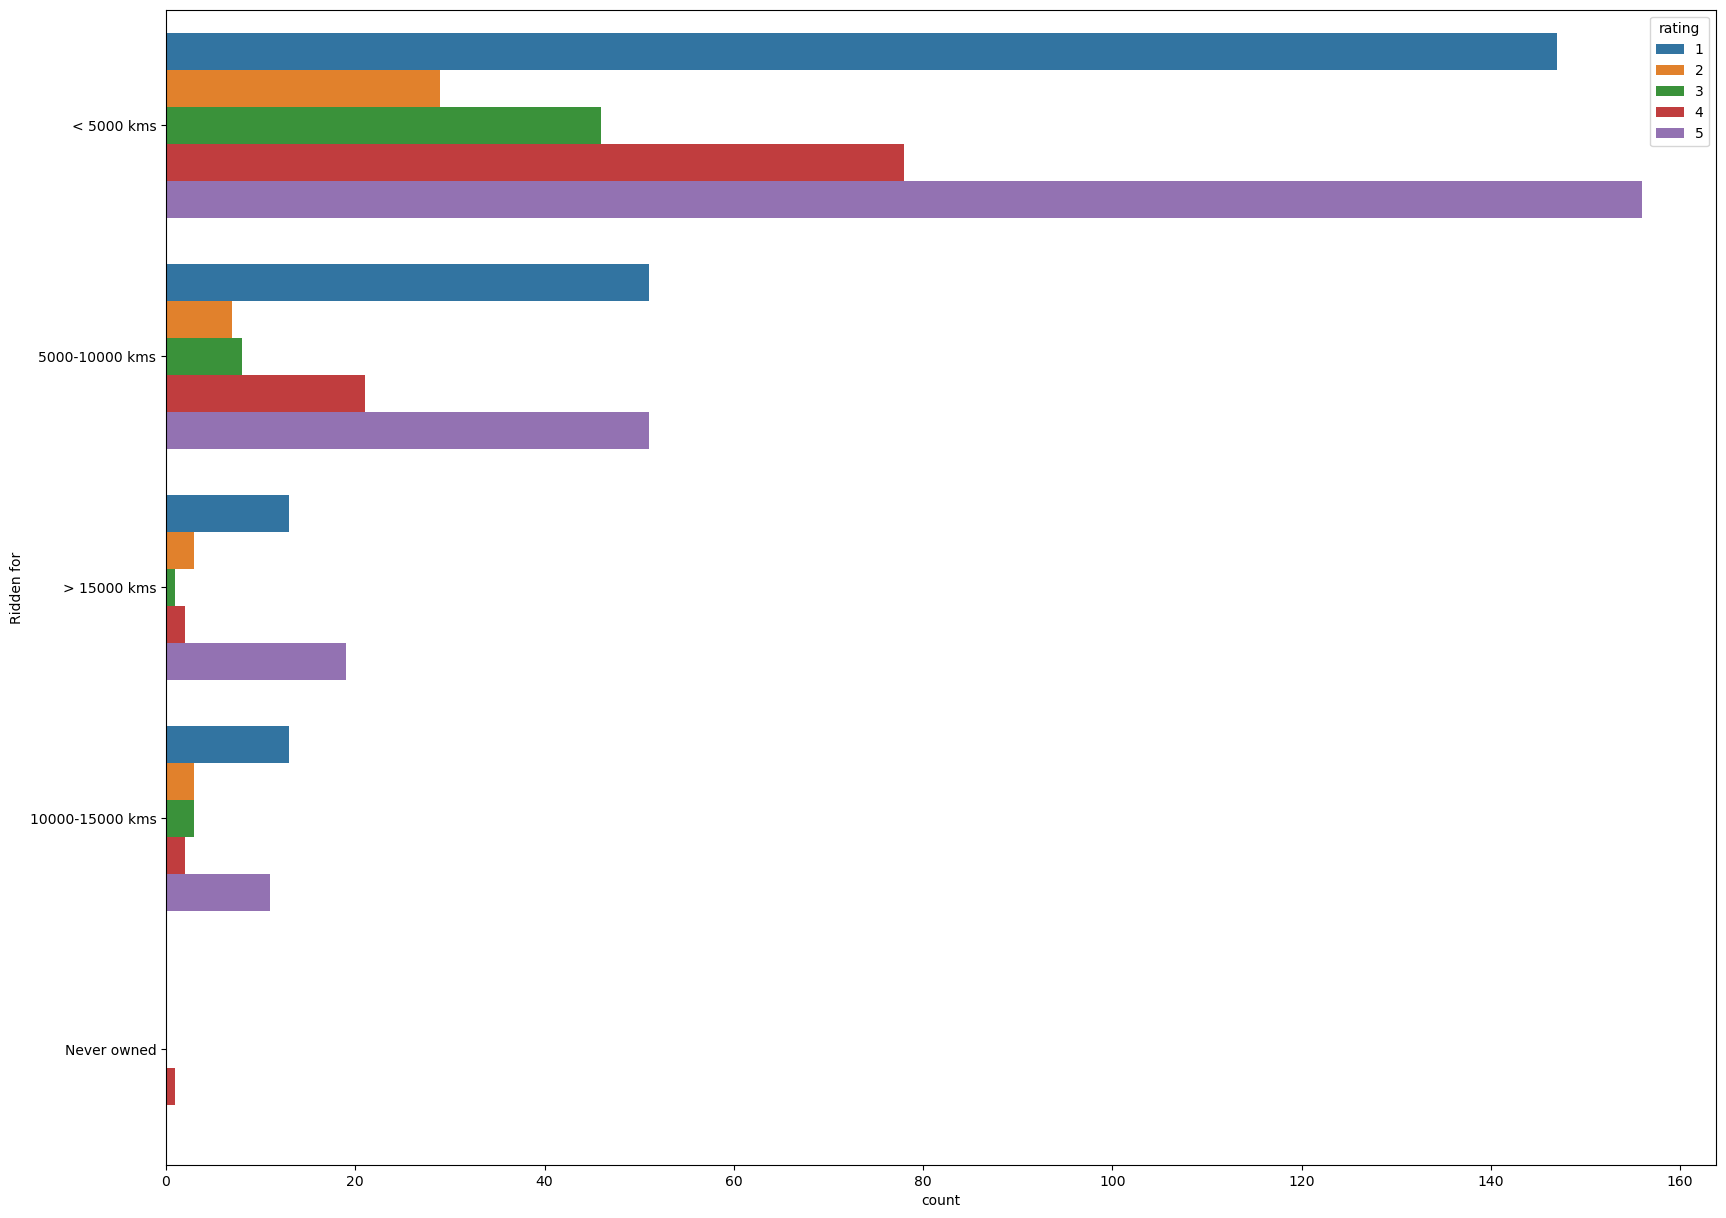

In [ ]:
plt.figure(figsize=(20, 15))
sns.countplot(y ='Ridden for', data = df, hue='rating')

In [ ]:
columns = df.columns[5:].values
df[columns] = df[columns].fillna(0)

In [ ]:
values = df[columns].values

In [ ]:
pca = PCA()

pca.fit_transform(values)
std = pca.components_.std(axis=0)
cumsumProportions = pca.explained_variance_ratio_.cumsum()

for idx in range(len(columns)):
    print("column: {} \n Standard Deviation: {} \n Proportion of Variance: {} \n Cumulative Proportion: {} \n\n".
    format(columns[idx], std[idx], pca.explained_variance_ratio_[idx], cumsumProportions[idx]))

column: Visual Appeal 
 Standard Deviation: 0.3532628905841653 
 Proportion of Variance: 0.462081287531437 
 Cumulative Proportion: 0.462081287531437 


column: Reliability 
 Standard Deviation: 0.3411342587396782 
 Proportion of Variance: 0.34342635963840984 
 Cumulative Proportion: 0.8055076471698468 


column: Performance 
 Standard Deviation: 0.35317883664218386 
 Proportion of Variance: 0.10017254389578374 
 Cumulative Proportion: 0.9056801910656306 


column: Service Experience 
 Standard Deviation: 0.3342685992907384 
 Proportion of Variance: 0.03365740833787426 
 Cumulative Proportion: 0.9393375994035048 


column: Extra Features 
 Standard Deviation: 0.34829746748948726 
 Proportion of Variance: 0.02162226709395296 
 Cumulative Proportion: 0.9609598664974578 


column: Comfort 
 Standard Deviation: 0.35179187133764234 
 Proportion of Variance: 0.015990317293016084 
 Cumulative Proportion: 0.9769501837904738 


column: Maintenance cost 
 Standard Deviation: 0.35080877570957564 

In [ ]:
pd.DataFrame(pca.components_.T, columns=[f"PC{i+1}" for i in range(len(columns))], index=columns)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
Visual Appeal,-0.425254,0.188177,0.008301,-0.705869,0.282484,0.422296,0.159249,-0.044020
Reliability,-0.466683,0.209049,-0.070674,0.089649,-0.827253,0.083579,0.172152,0.067109
Performance,-0.076763,0.581816,0.473482,-0.039785,-0.013944,-0.226248,-0.546763,-0.281954
Service Experience,-0.466912,0.180007,-0.112297,0.682418,0.420151,0.287857,0.033840,-0.103691
Extra Features,0.028329,0.394702,-0.392034,-0.043162,0.107014,-0.098450,-0.278185,0.767674
Comfort,-0.494528,-0.269279,0.393170,-0.025767,0.182285,-0.590993,0.196927,0.326194
Maintenance cost,0.053182,0.412346,-0.436184,-0.070544,0.116922,-0.528231,0.459119,-0.358357
Value for Money,-0.359551,-0.389416,-0.509520,-0.137593,-0.027982,-0.206489,-0.563871,-0.281361


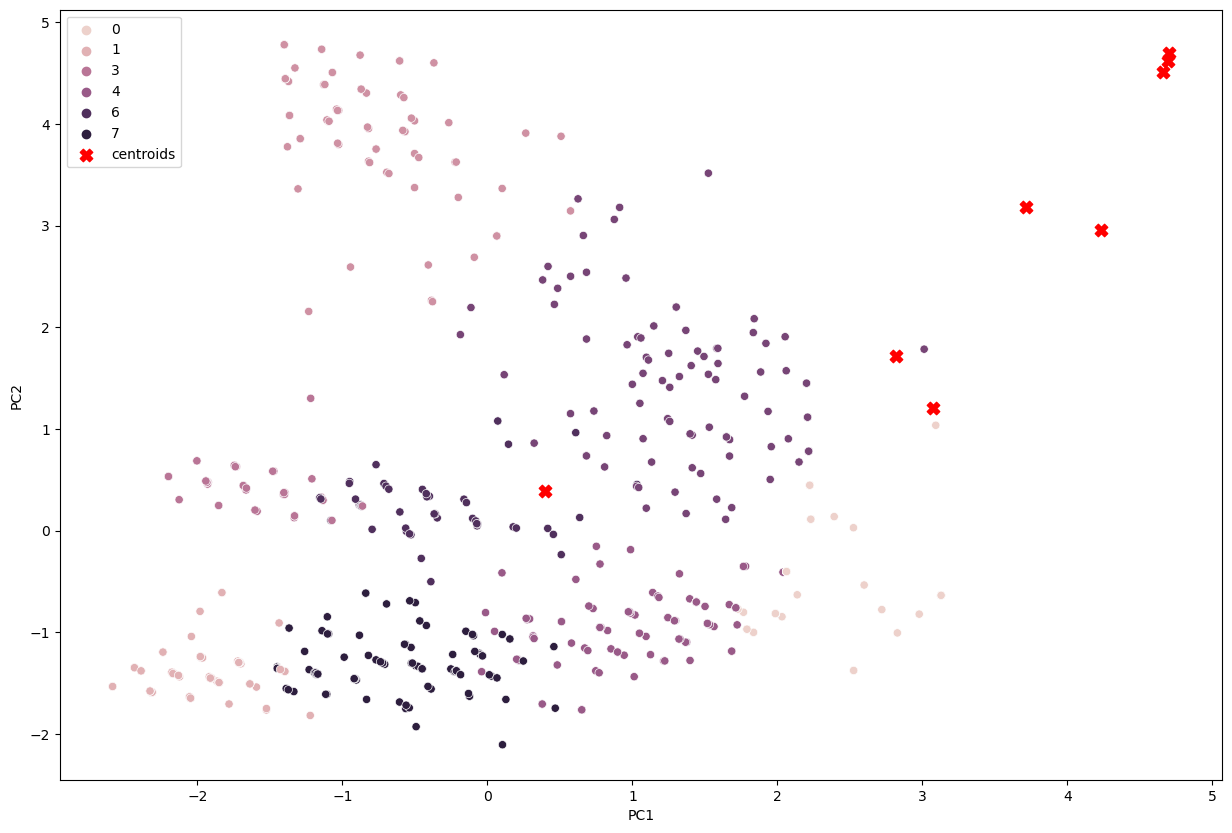

In [ ]:
plt.figure(figsize=(15, 10))
kmeans = KMeans(8, random_state=0).fit(values)
scaled_data = StandardScaler().fit_transform(values)
pca = PCA(n_components=8)
pca_data = pca.fit_transform(scaled_data)

pf = pd.DataFrame(data=pca_data, columns=[f"PC{i+1}" for i in range(len(columns))])
sns.scatterplot(data=pf, x='PC1', y='PC2', hue=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='X', c="r", s=80, label='centroids')
plt.legend()
plt.show()


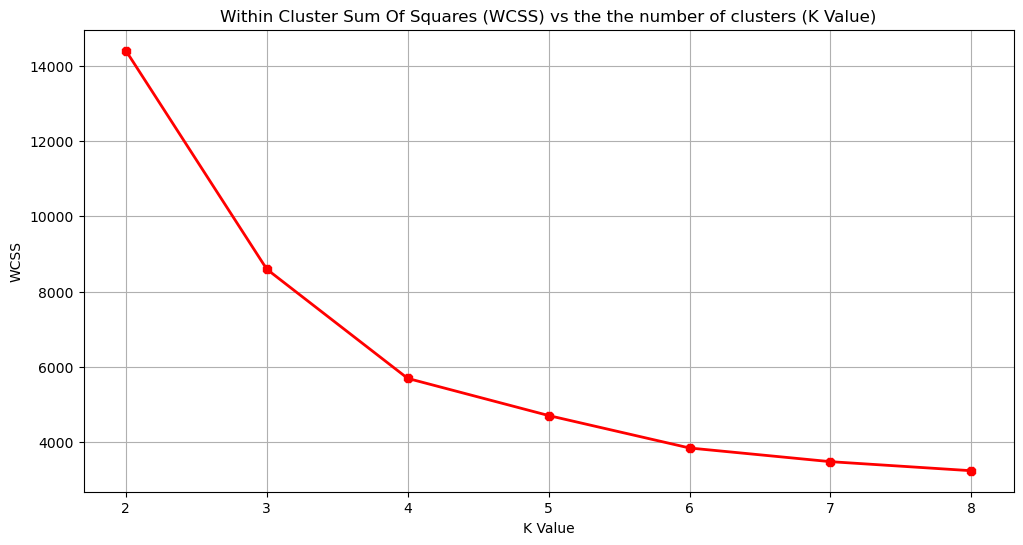

In [ ]:
wcss = []
for k in range(2,9):
    kmeans = KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(values)
    wcss.append(kmeans.inertia_)
    
plt.figure(figsize=(12,6))    
plt.grid()
plt.plot(range(2,9),wcss, linewidth=2, color="red", marker="8")
plt.xlabel("K Value")
plt.xticks(np.arange(2,9,1))
plt.title('Within Cluster Sum Of Squares (WCSS) vs the the number of clusters (K Value)')
plt.ylabel("WCSS")
plt.show()


For n_clusters = 2 The average silhouette_score is : 0.3655582570314462
For n_clusters = 3 The average silhouette_score is : 0.46645212221643917
For n_clusters = 4 The average silhouette_score is : 0.5236812643763783
For n_clusters = 5 The average silhouette_score is : 0.4646784836687874
For n_clusters = 6 The average silhouette_score is : 0.4747358246318907
For n_clusters = 7 The average silhouette_score is : 0.43596922714158387
For n_clusters = 8 The average silhouette_score is : 0.41406771031700124


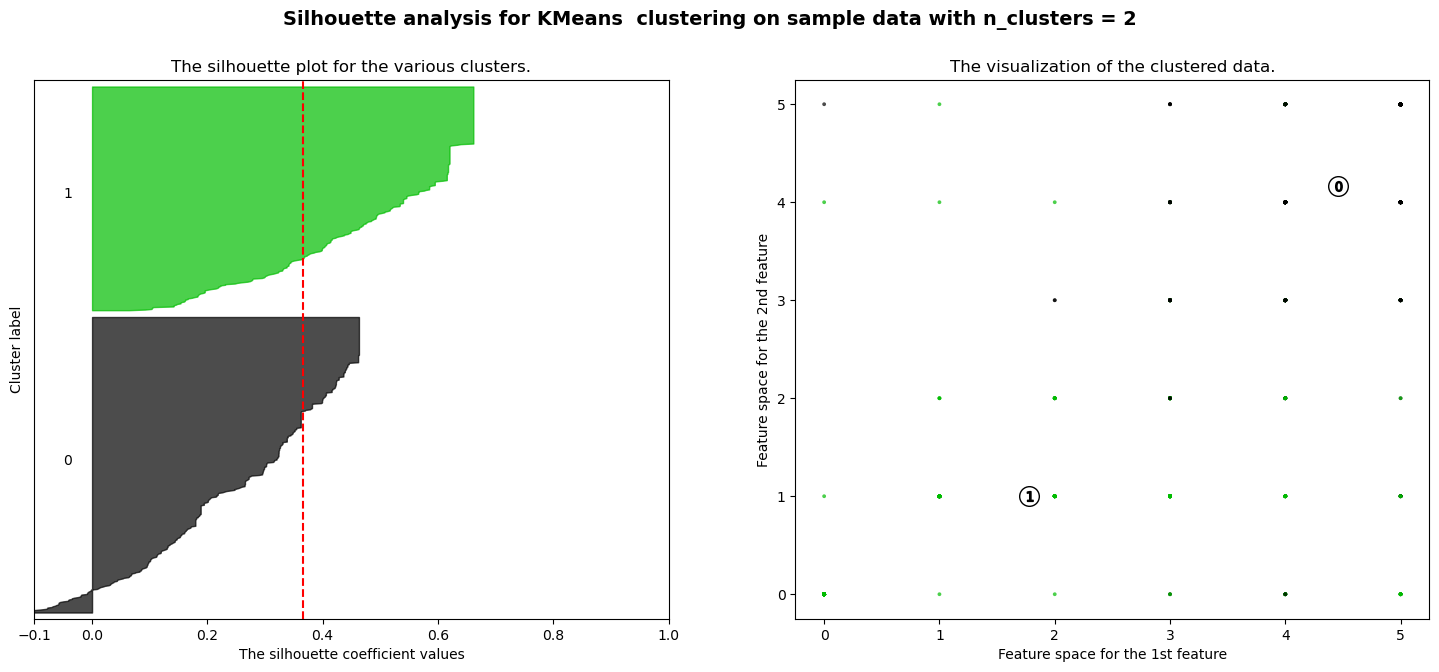

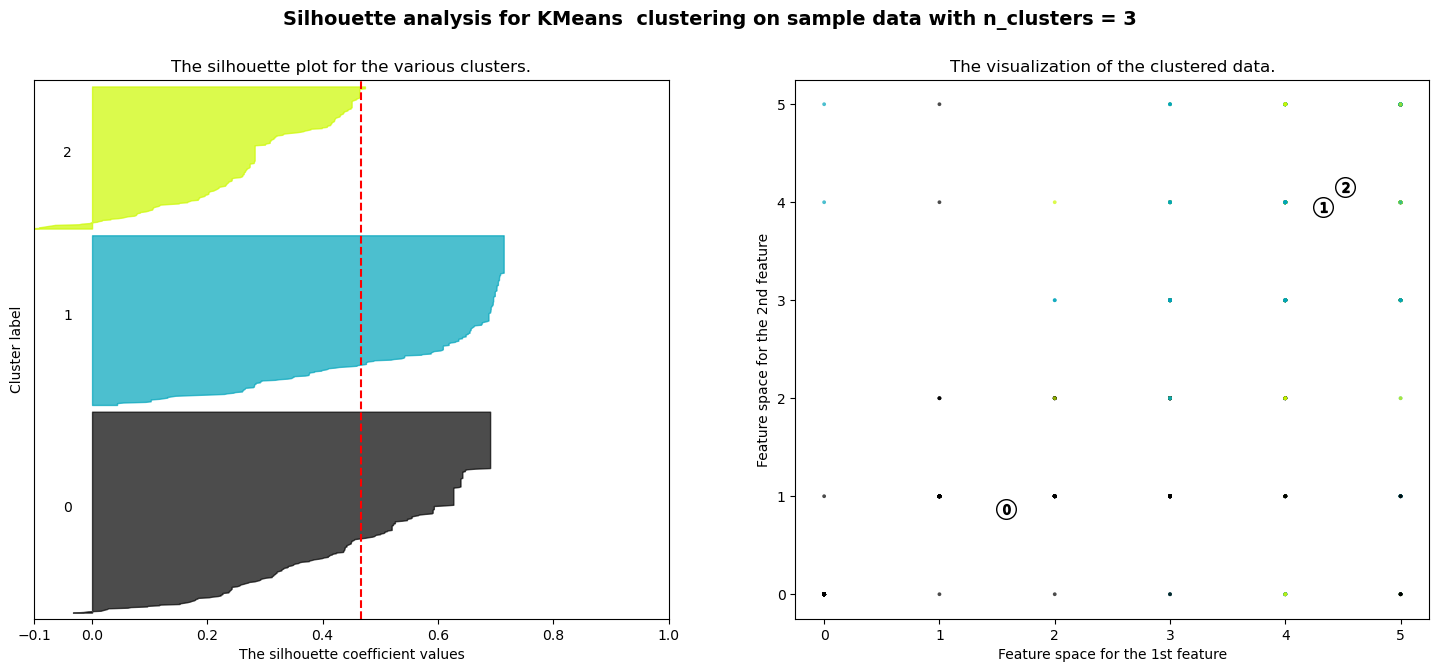

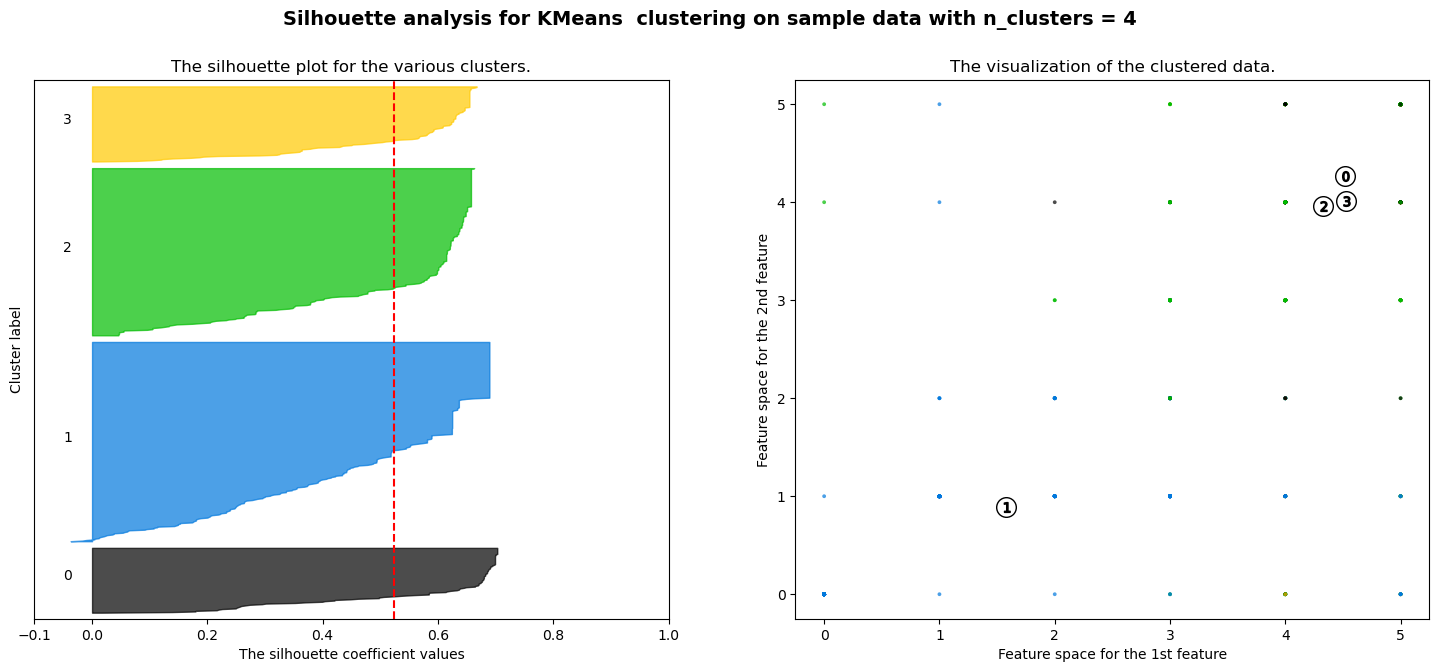

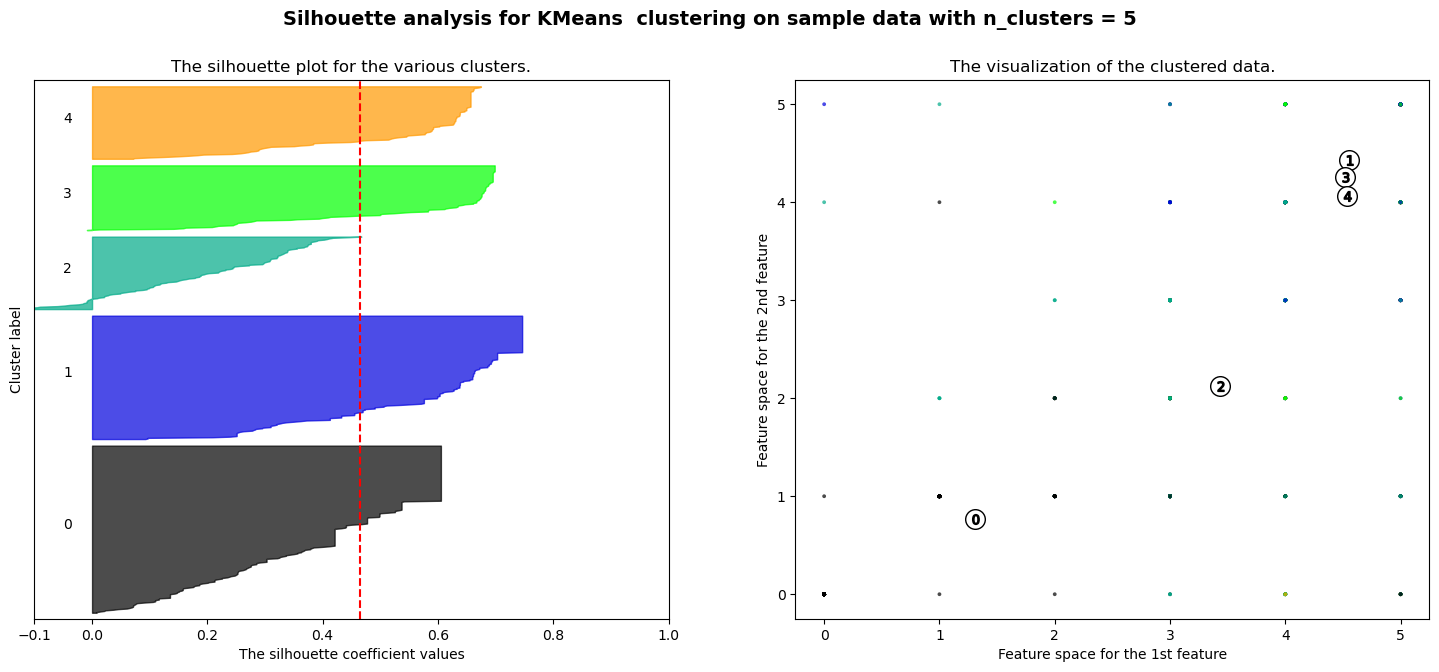

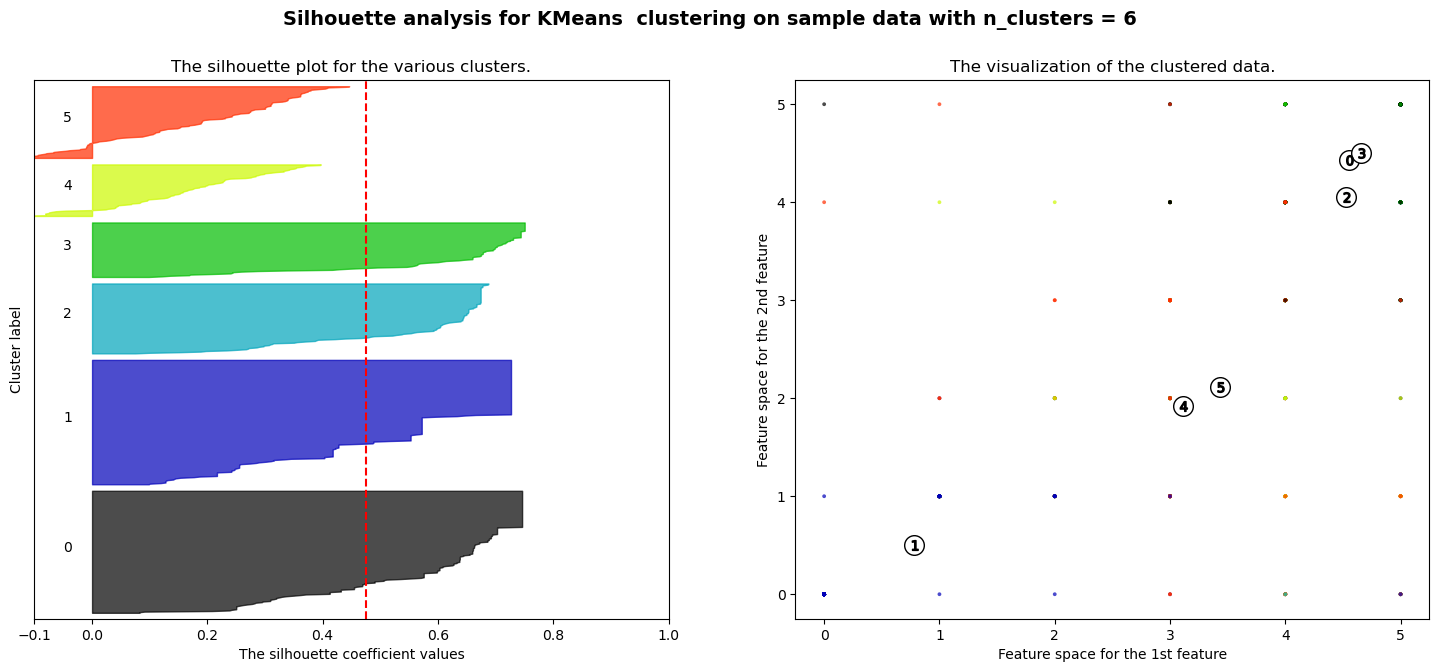

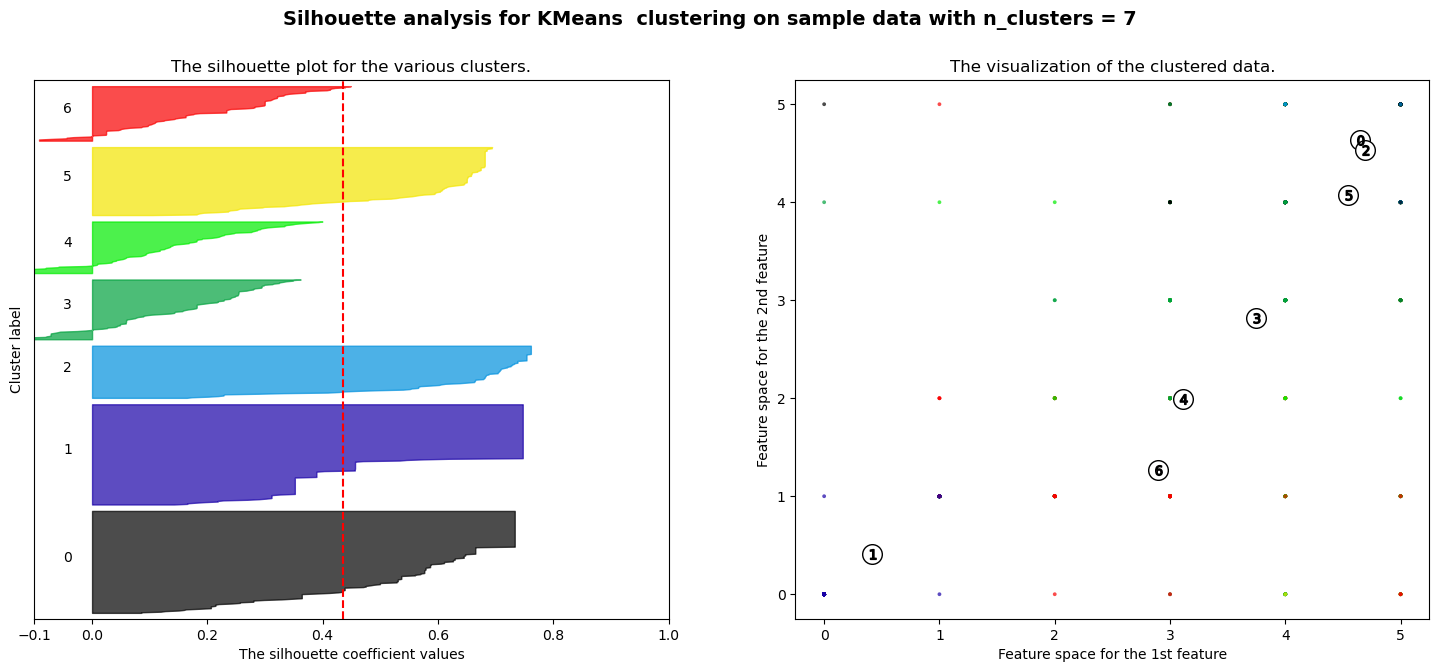

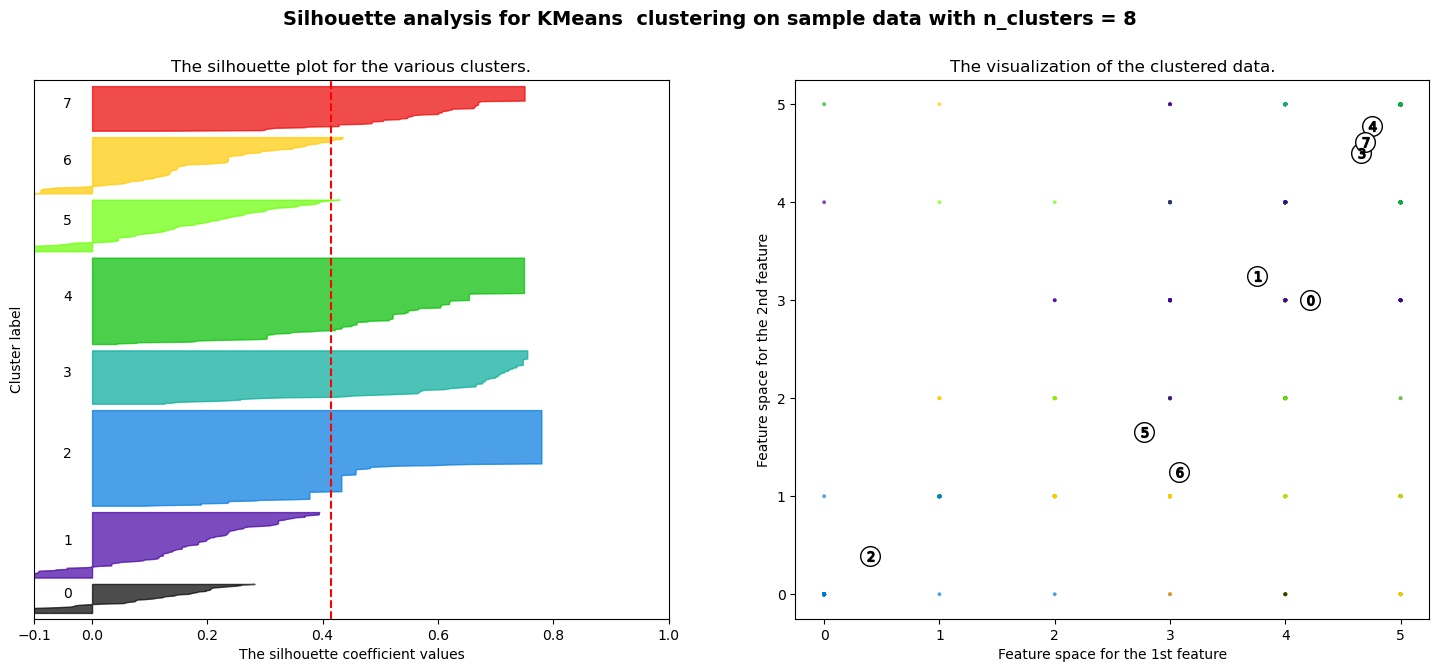

In [ ]:
X = values

import matplotlib.cm as cm
from sklearn.metrics import silhouette_samples, silhouette_score

range_n_clusters = np.arange(2, 9)

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])
 
     # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
              edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans  clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

In [ ]:
rng = np.random.default_rng()

kmeans = KMeans(n_clusters=3)
X = rng.choice(values, 200, axis=0)
kmeans.fit(X)

KMeans(n_clusters=3)

In [ ]:
target = df['rating'].values

In [ ]:
from sklearn.mixture import GaussianMixture
bic = []
aic = []

for k in range(2, 9):
    model = GaussianMixture(n_components=k, init_params='random')
    data = np.append(values, target.reshape(-1,1), axis=1)
    model.fit(data)
    print("For K : {} \t convergence after: {} iterations \n \n".format(k, model.n_iter_))

    bic.append(model.bic(data))
    aic.append(model.aic(data))

For K : 2 	 convergence after: 13 iterations 
 

For K : 3 	 convergence after: 23 iterations 
 

For K : 4 	 convergence after: 16 iterations 
 

For K : 5 	 convergence after: 17 iterations 
 

For K : 6 	 convergence after: 22 iterations 
 

For K : 7 	 convergence after: 31 iterations 
 

For K : 8 	 convergence after: 19 iterations 
 



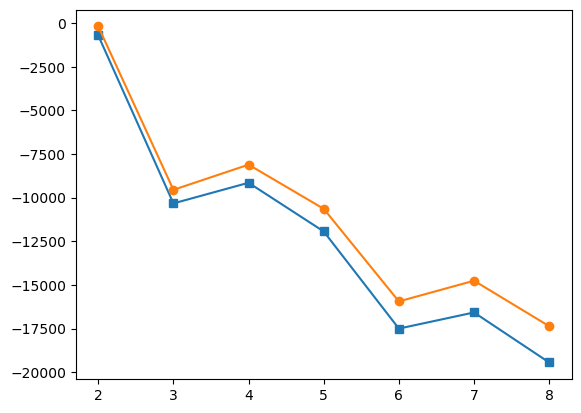

In [ ]:

plt.plot(np.arange(2, 9), aic, marker = 's')
plt.plot(np.arange(2, 9), bic, marker = 'o')


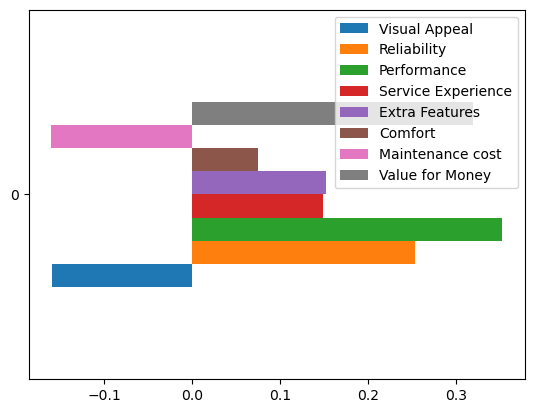

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(values, target)

pd.DataFrame(lr.coef_.reshape(1,-1), columns=columns).plot(y=columns, kind='barh')
plt.show()

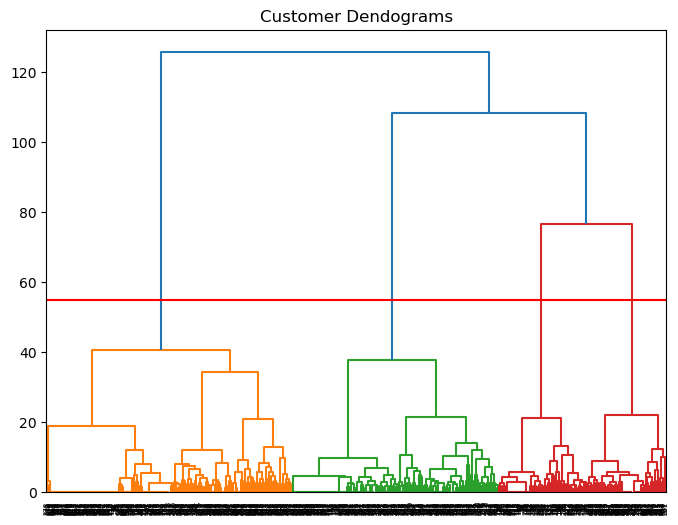

In [ ]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(8,6))
plt.title("Customer Dendograms")
dend = shc.dendrogram(shc.linkage(values, method='ward'))
plt.axhline(y = 55, color = 'r', linestyle = '-')
plt.show()

In [ ]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
cluster.fit_predict(values)

array([2, 1, 2, 1, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 0, 0, 0, 1,
       2, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 2, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 2, 2, 2, 2, 2, 1, 2, 0, 2, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 2, 0, 0, 0, 1, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1,
       1, 2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 2, 2, 1, 1, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1,
       1, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 2, 1, 1, 0, 1, 0, 2, 0, 1, 2, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 2, 2, 2, 1, 2, 1, 2, 1, 1, 1,

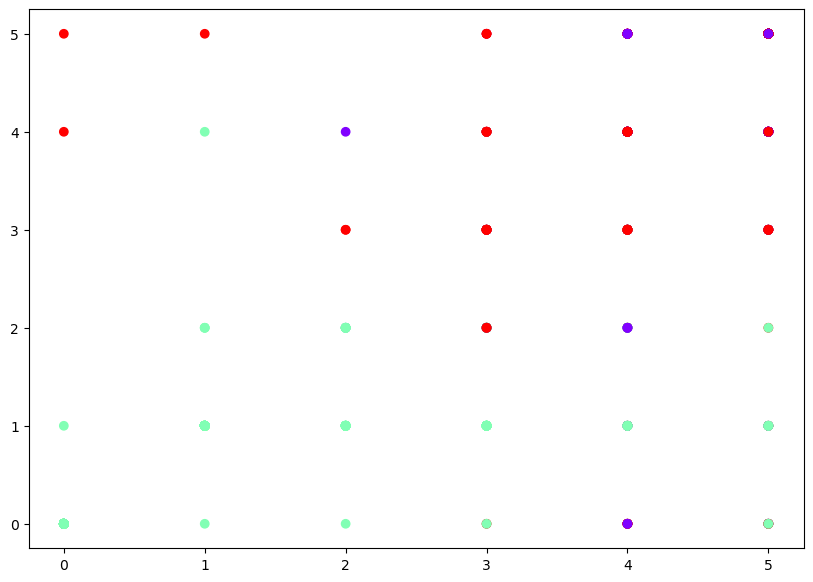

In [ ]:
plt.figure(figsize=(10, 7))
plt.scatter(values[:,0], values[:,1], c=cluster.labels_, cmap='rainbow')

In [ ]:
from statsmodels.graphics.mosaicplot import mosaic
kmeans = KMeans(3, random_state=0).fit(values)
crosstabLike = pd.crosstab(kmeans.labels_, target)

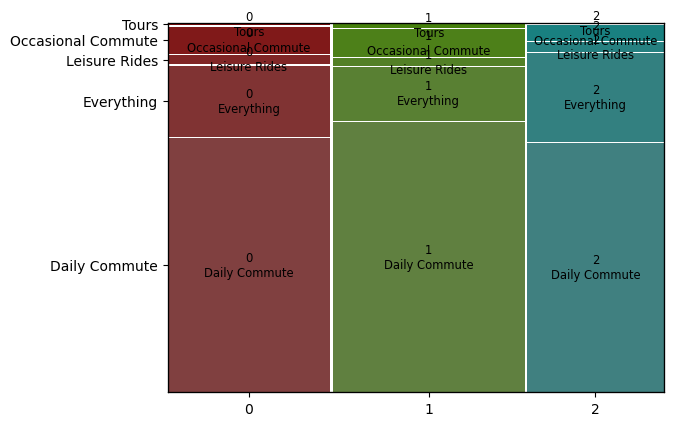

In [ ]:
crosstabCondition = pd.crosstab(kmeans.labels_, df['Used it for'])
mosaic(crosstabCondition.stack())
plt.show()

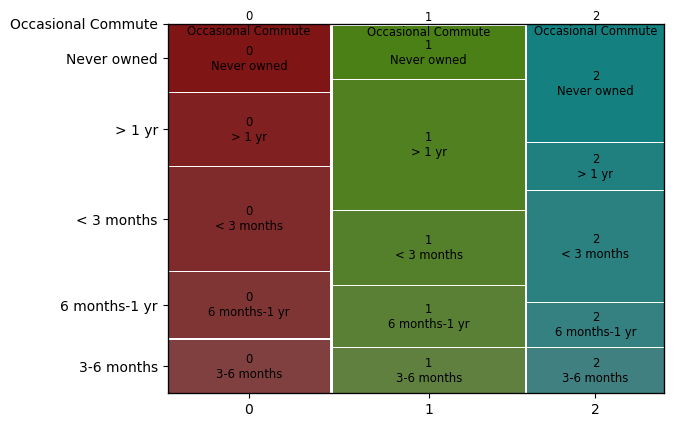

In [ ]:
# Owned for
crosstabDriven = pd.crosstab(kmeans.labels_, df['Owned for'])
mosaic(crosstabDriven.stack())
plt.show()

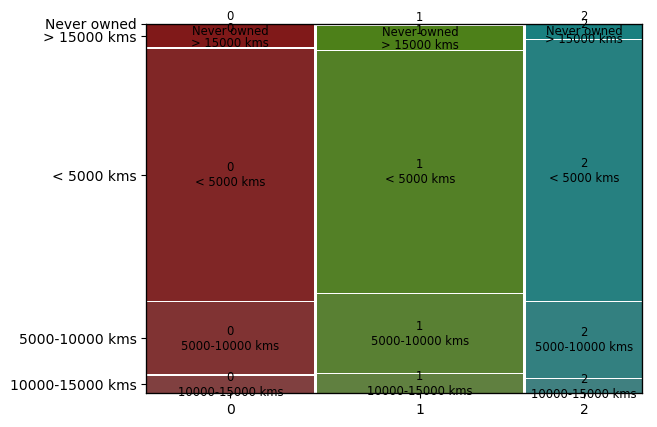

In [ ]:
# Ridden for
crosstabDriven = pd.crosstab(kmeans.labels_, df['Ridden for'])
mosaic(crosstabDriven.stack())
plt.show()

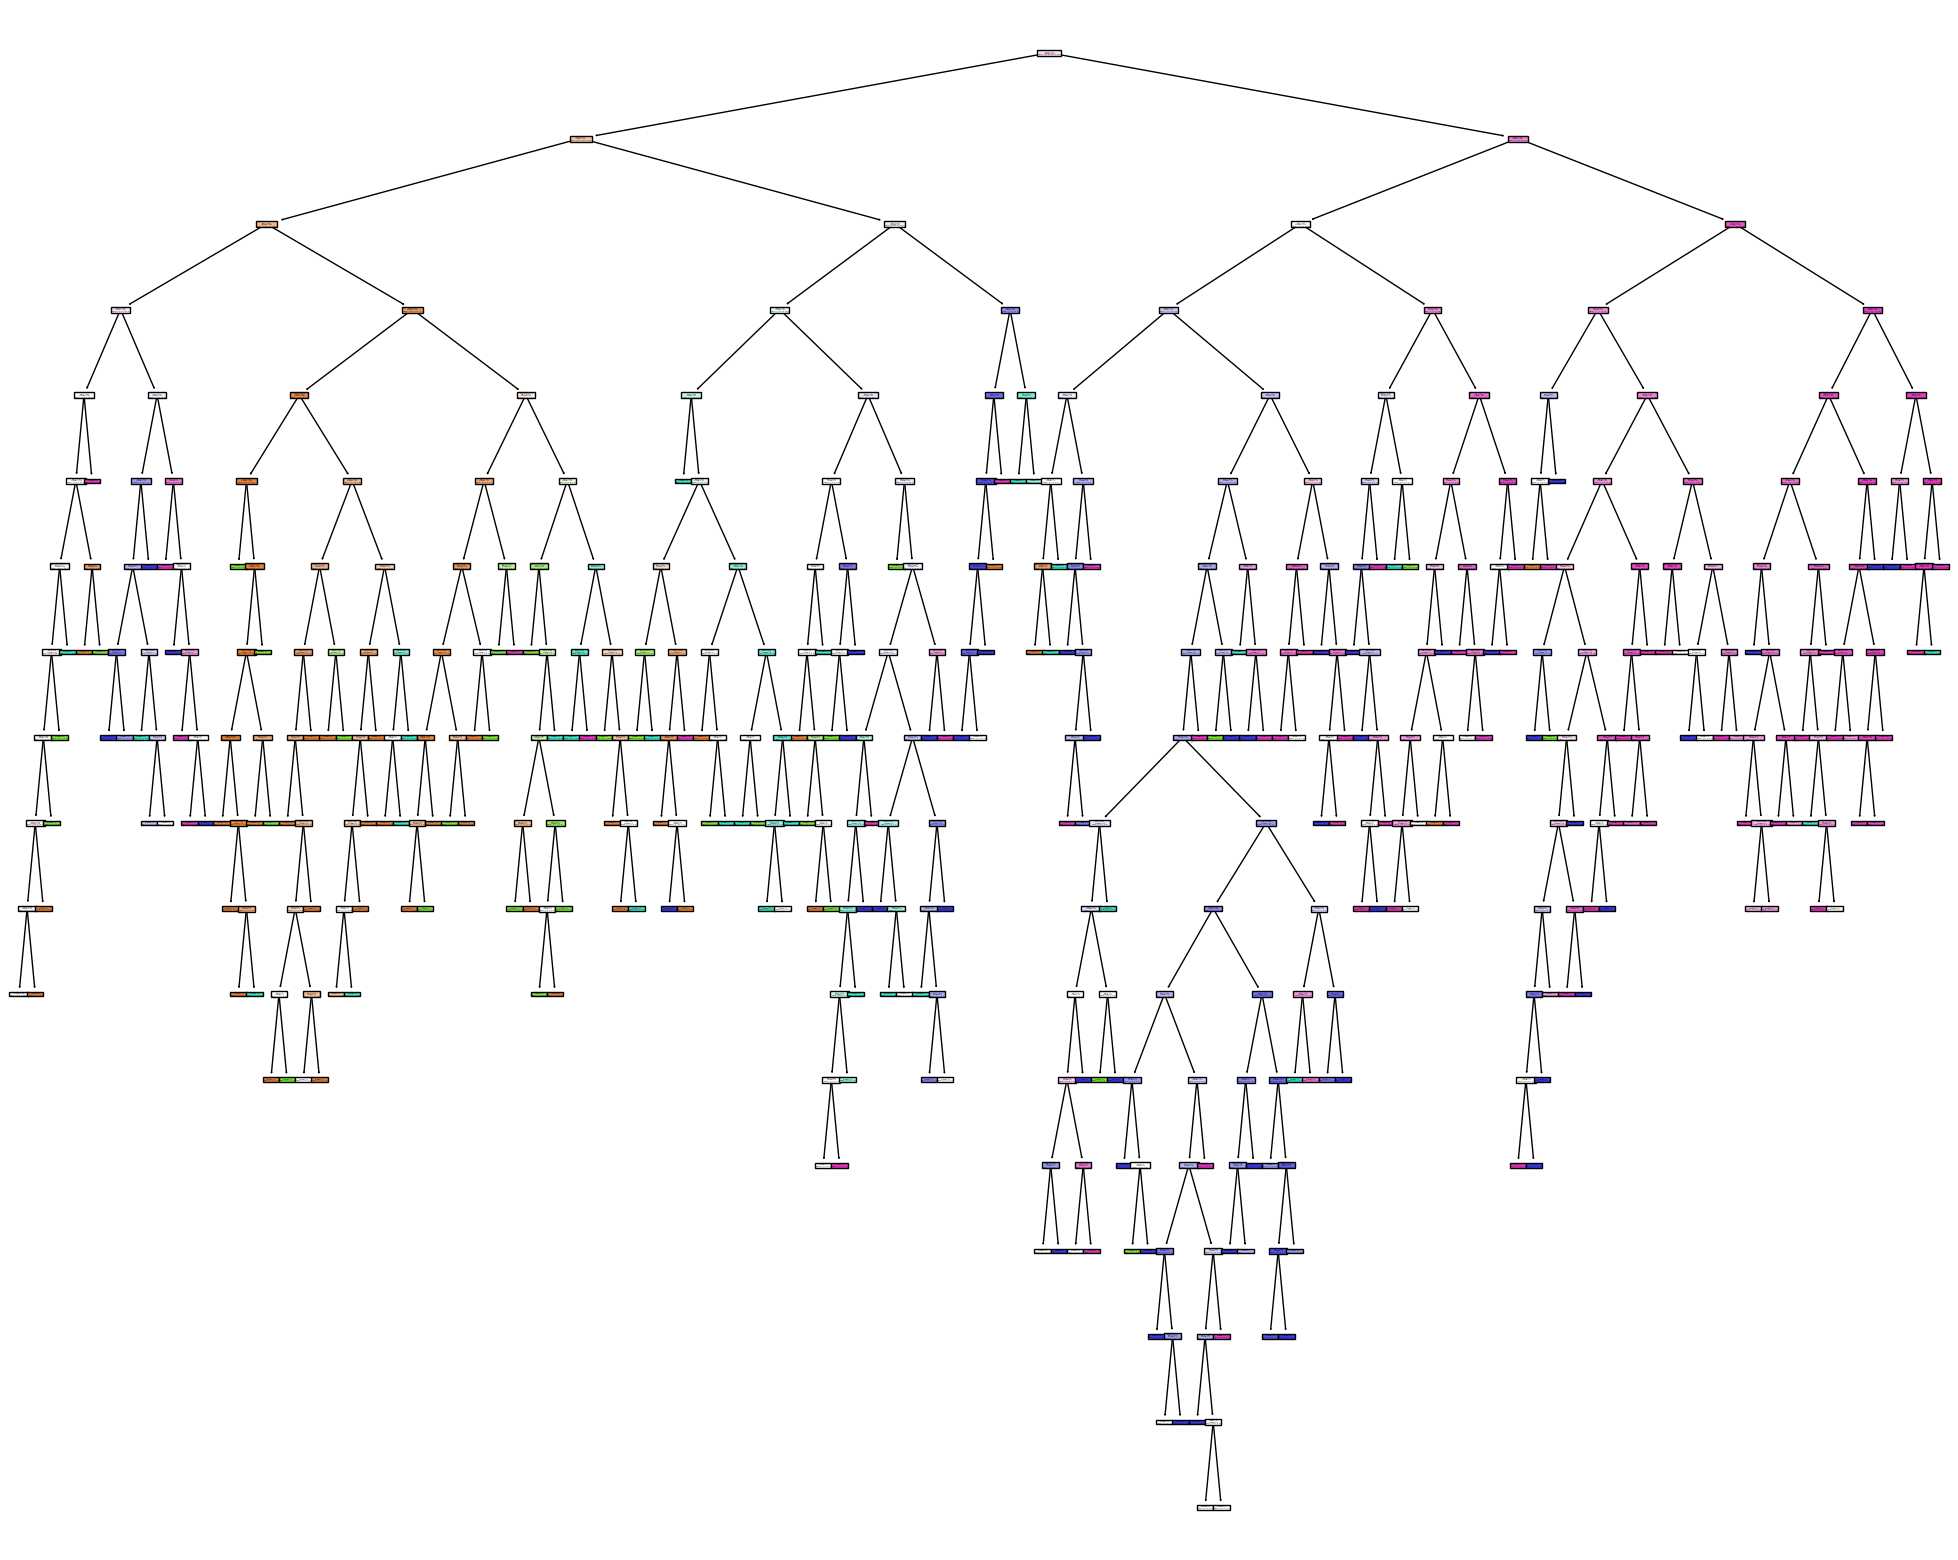

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
dtree = DecisionTreeClassifier()
dtree.fit(values, target)

fig = plt.figure(figsize=(25,20))
_ = plot_tree(dtree, 
                   feature_names=columns,  
                   filled=True)

In [ ]:
df['KmeansLabels'] = kmeans.labels_

In [ ]:
from sklearn.preprocessing import OrdinalEncoder
ordinal = OrdinalEncoder()
columns = df.columns[1:4].values
df[columns] = ordinal.fit_transform(df[columns])

In [ ]:
Usage = df.groupby('KmeansLabels')['Used it for'].mean()
Usage = Usage.to_frame().reset_index()

Owned = df.groupby('KmeansLabels')['Owned for'].mean()
Owned = Owned.to_frame().reset_index()

Rating = df.groupby('KmeansLabels')['rating'].mean()
Rating = Rating.to_frame().reset_index()

Ridden = df.groupby('KmeansLabels')['Ridden for'].mean()
Ridden = Ridden.to_frame().reset_index()


In [ ]:
segmentEvalplot = Ridden.merge(Rating, on='KmeansLabels', how='left').merge(Usage, on='KmeansLabels', how='left').merge(Owned, on='KmeansLabels',how='left')

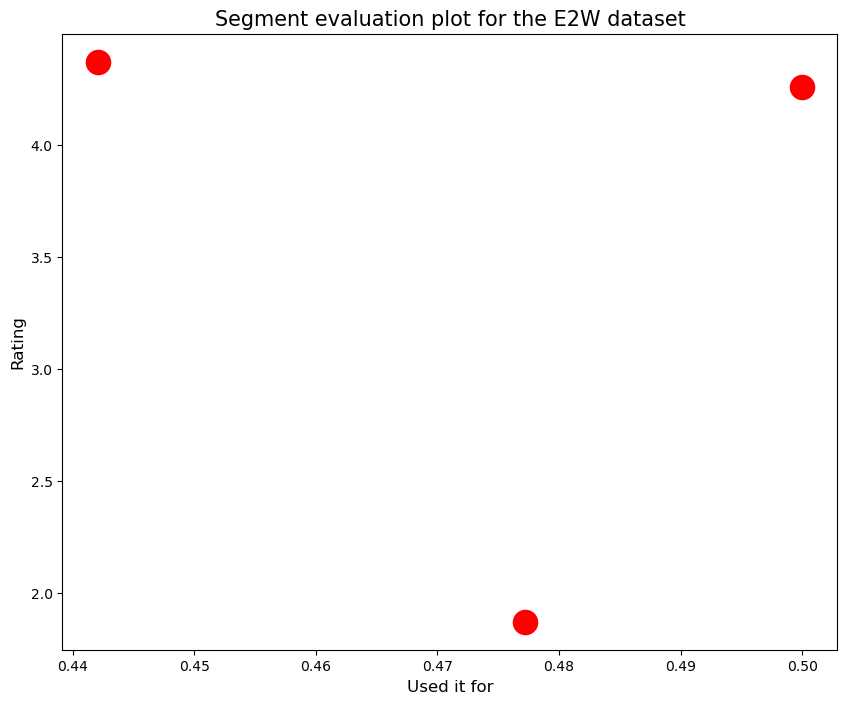

In [ ]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x = "Used it for", y = "rating",data=segmentEvalplot,s=400, color="r")
plt.title("Segment evaluation plot for the E2W dataset", fontsize = 15) 
plt.xlabel("Used it for", fontsize = 12) 
plt.ylabel("Rating", fontsize = 12) 
plt.show()

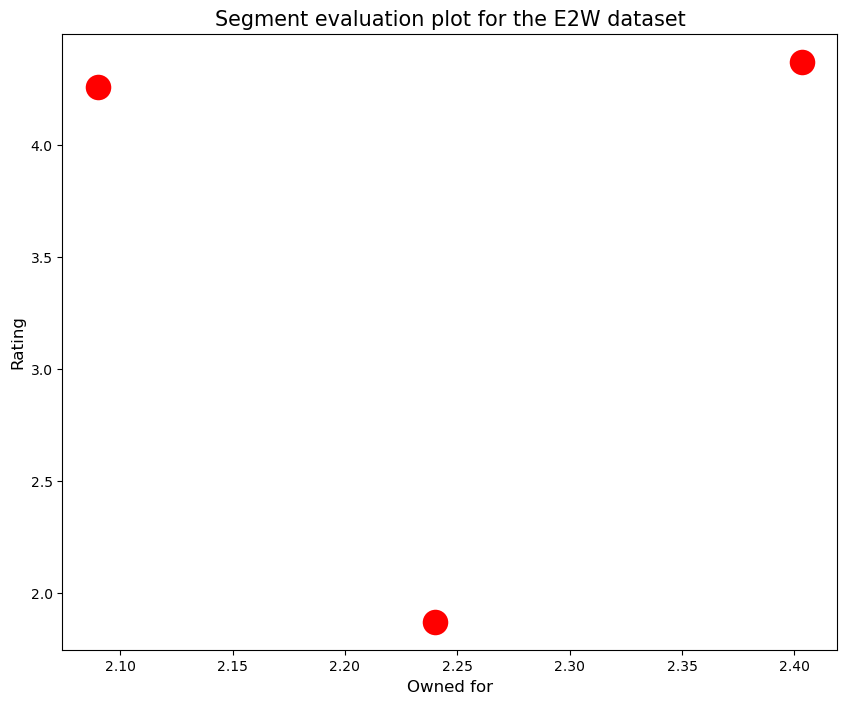

In [ ]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x = "Owned for", y = "rating",data=segmentEvalplot,s=400, color="r")
plt.title("Segment evaluation plot for the E2W dataset", fontsize = 15) 
plt.xlabel("Owned for", fontsize = 12) 
plt.ylabel("Rating", fontsize = 12) 
plt.show()

In [ ]:
# Change back the encodings
df['Used it for'] = df['Used it for'].map(lambda x: ordinal.categories_[0][int(x)] if pd.notna(x) else x)
df['Owned for'] = df['Owned for'].map(lambda x: ordinal.categories_[1][int(x)] if pd.notna(x) else x)
df['Ridden for'] = df['Ridden for'].map(lambda x: ordinal.categories_[2][int(x)] if pd.notna(x) else x)

In [ ]:
cols = df.columns[5:-1]
df[cols] = df[cols].where(df[cols] != 0, np.nan)

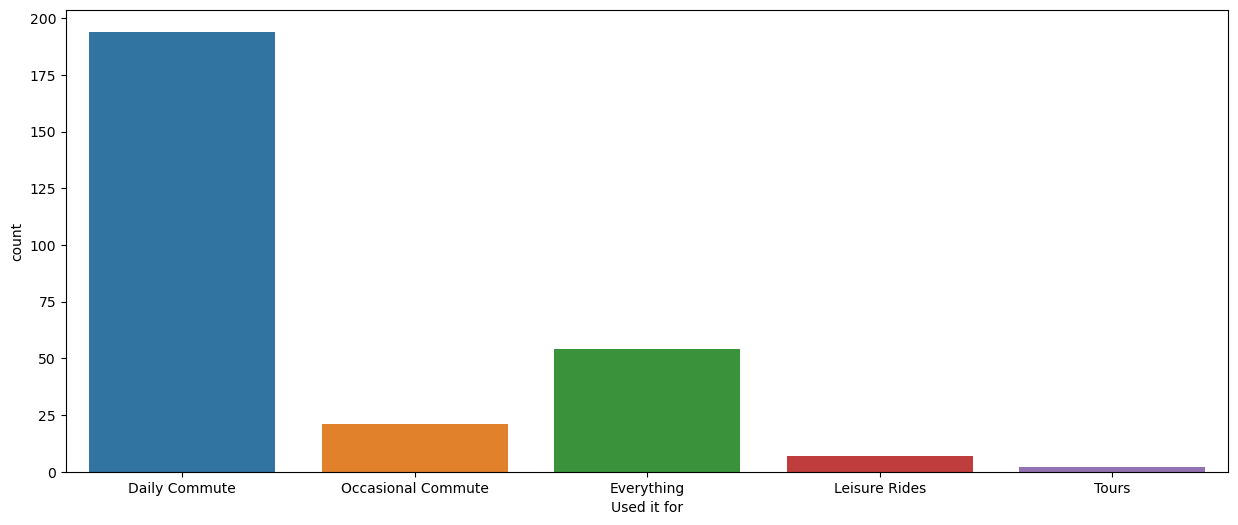

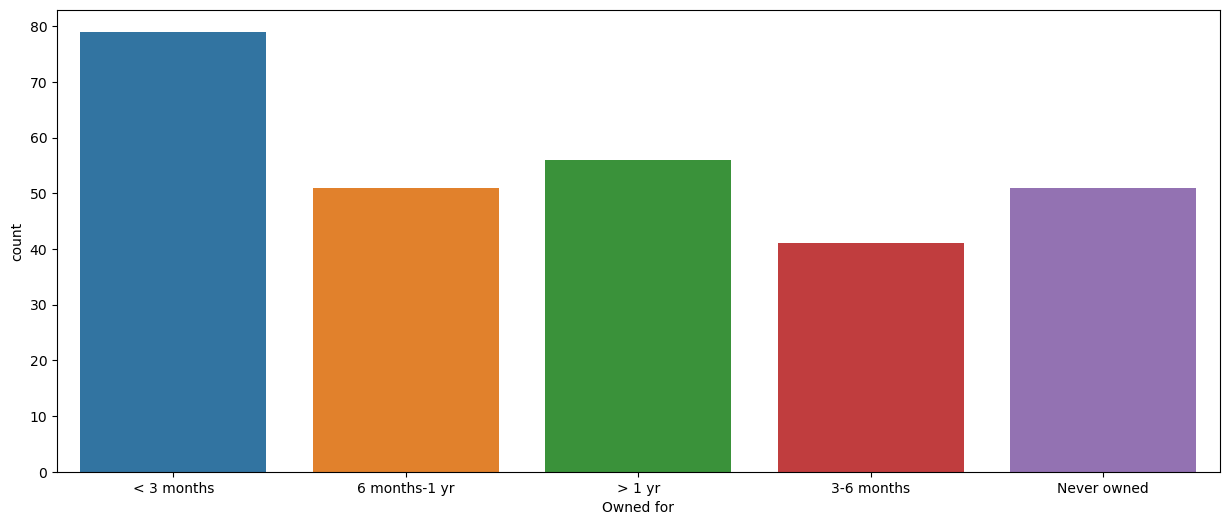

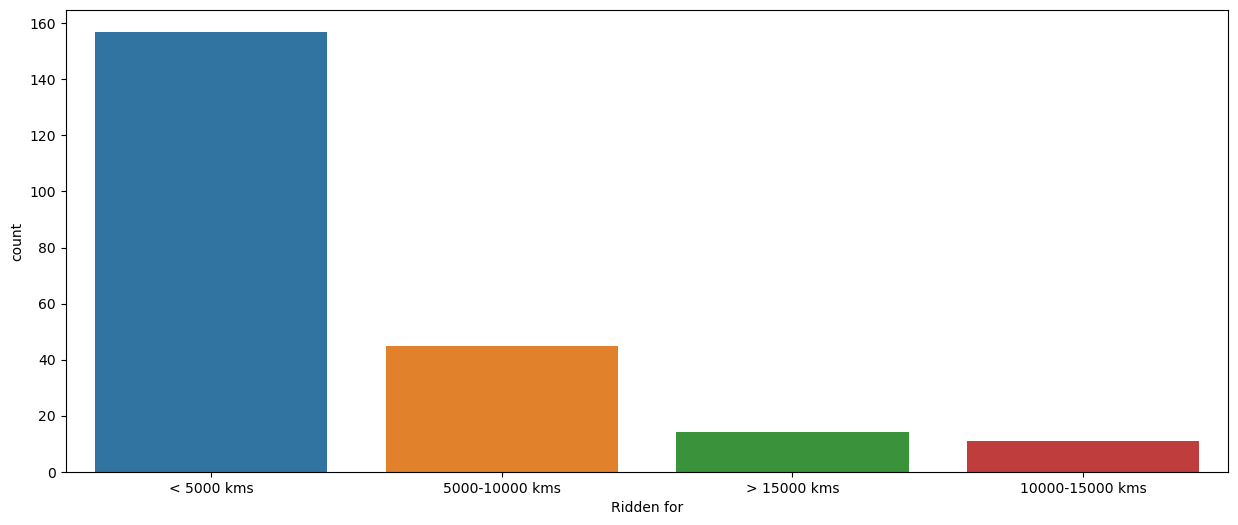

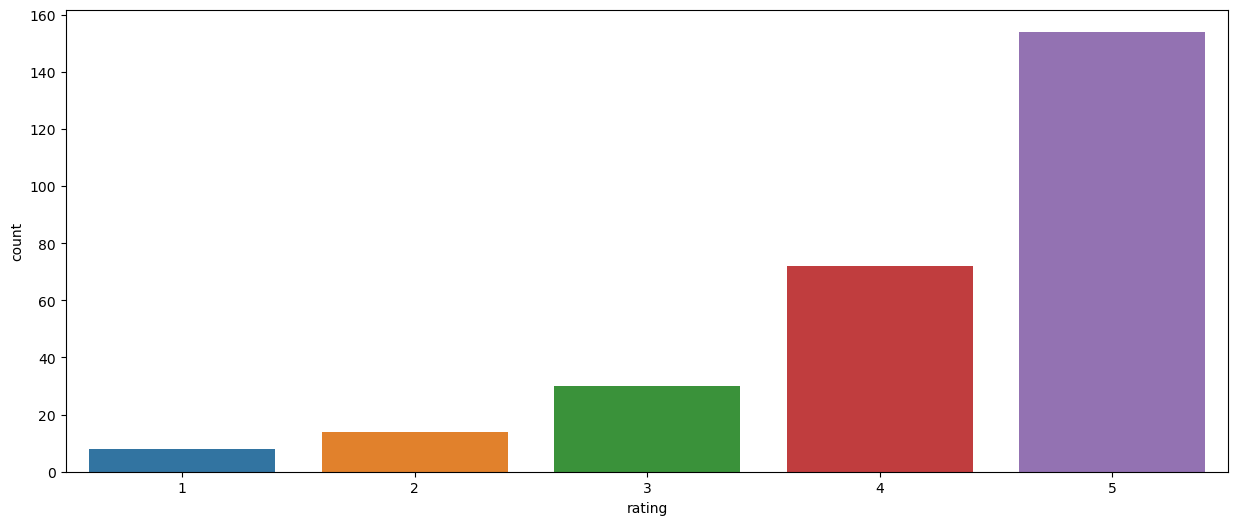

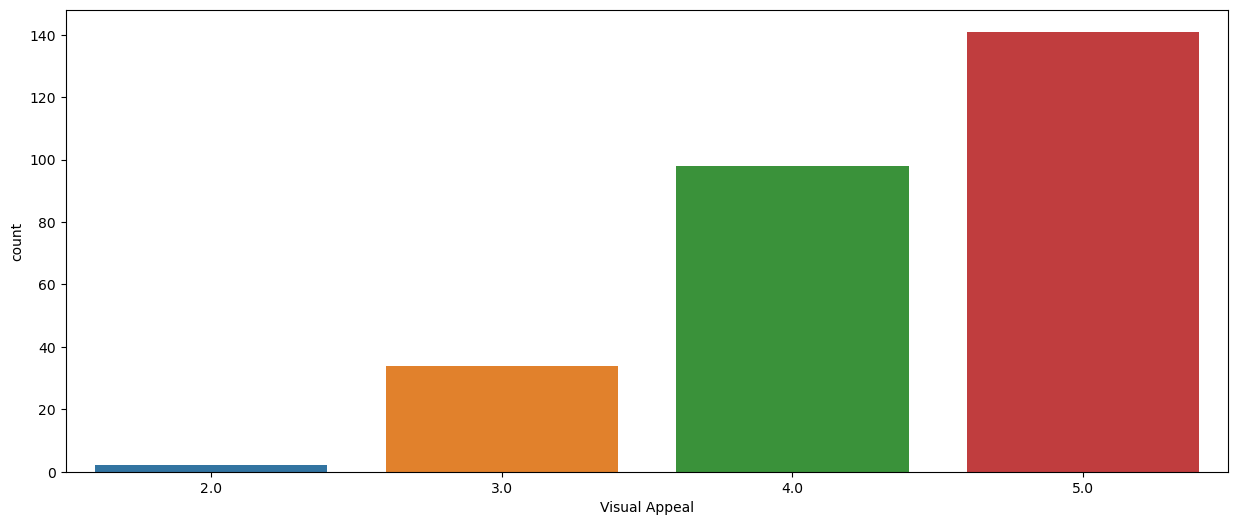

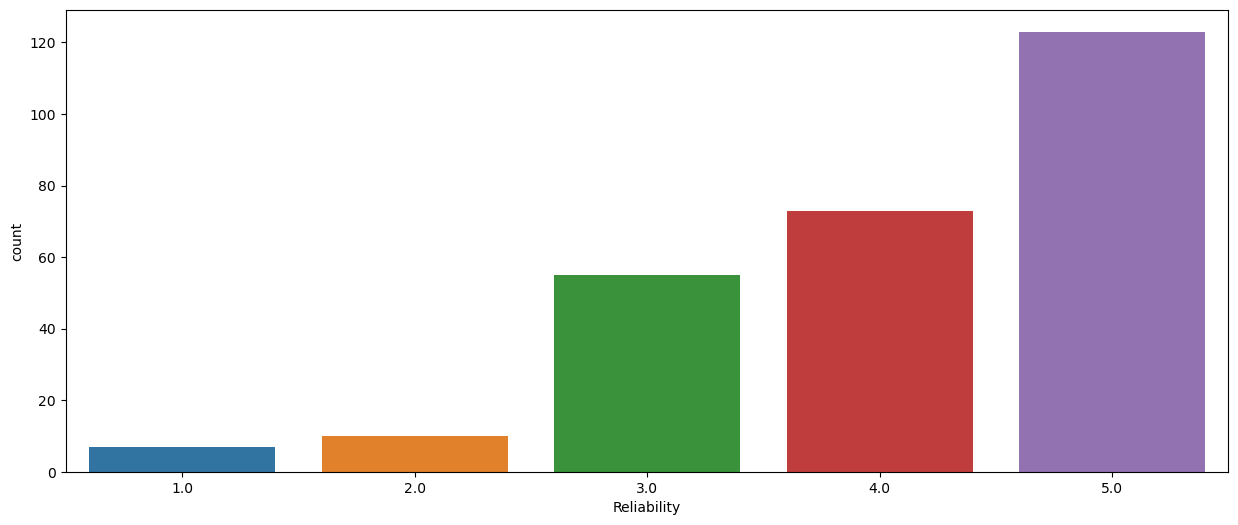

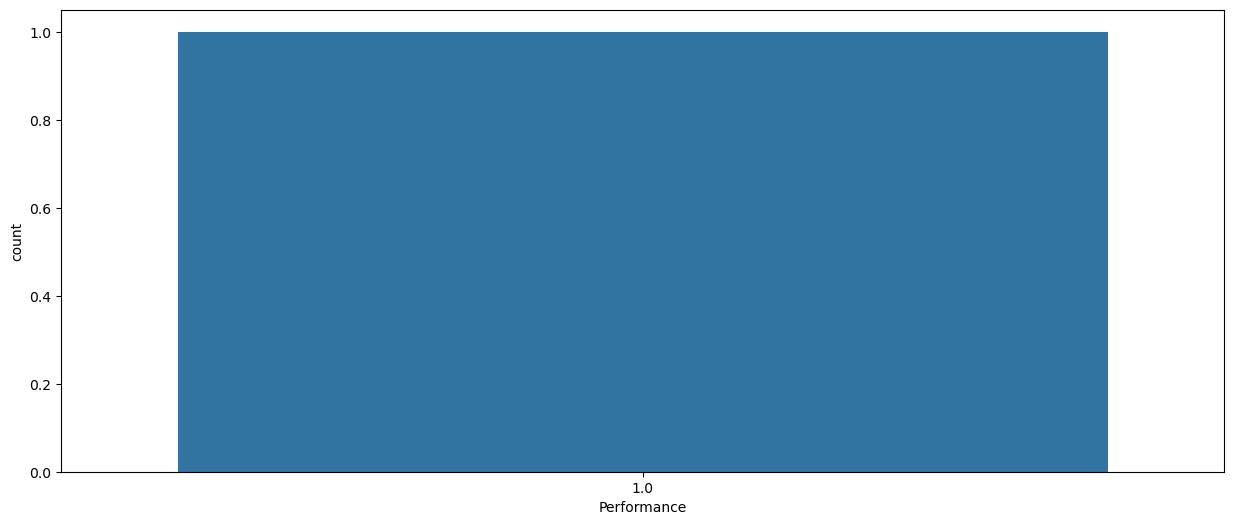

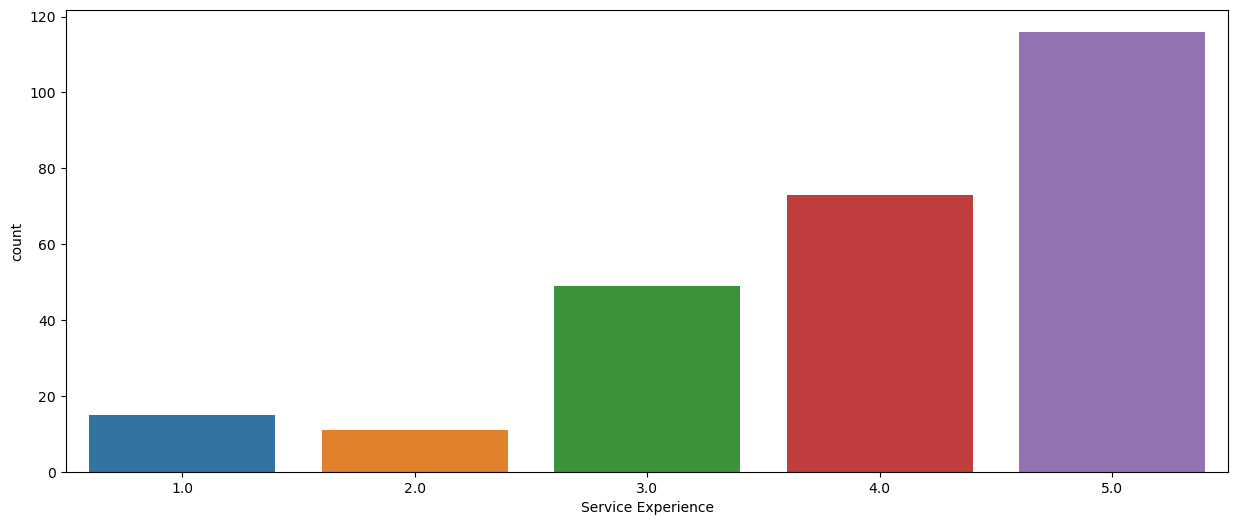

<Figure size 1500x600 with 0 Axes>

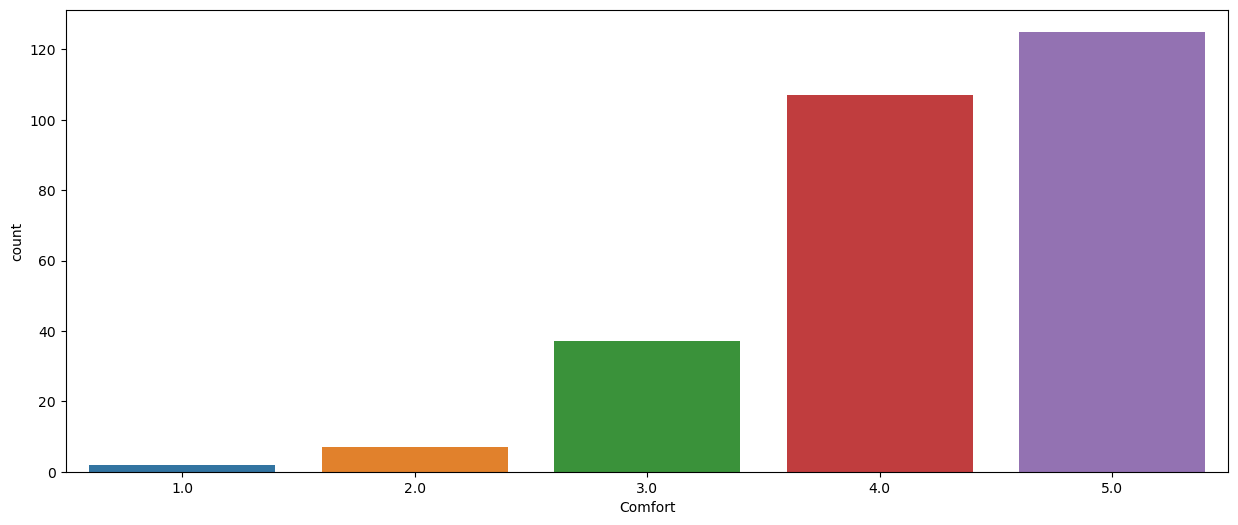

<Figure size 1500x600 with 0 Axes>

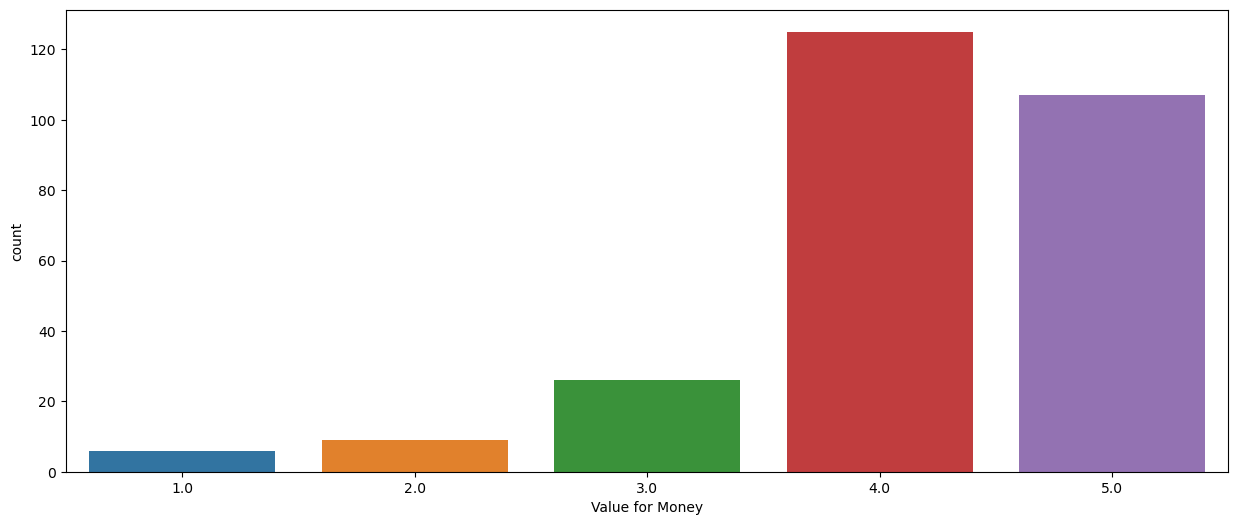

In [ ]:

columns = df.columns[1:-1]
for col in columns:
    try:
        plt.figure(figsize=(15, 6))
        sns.countplot(df[df['KmeansLabels'] == 0][col])
        plt.show(block=False)
    except:
        pass


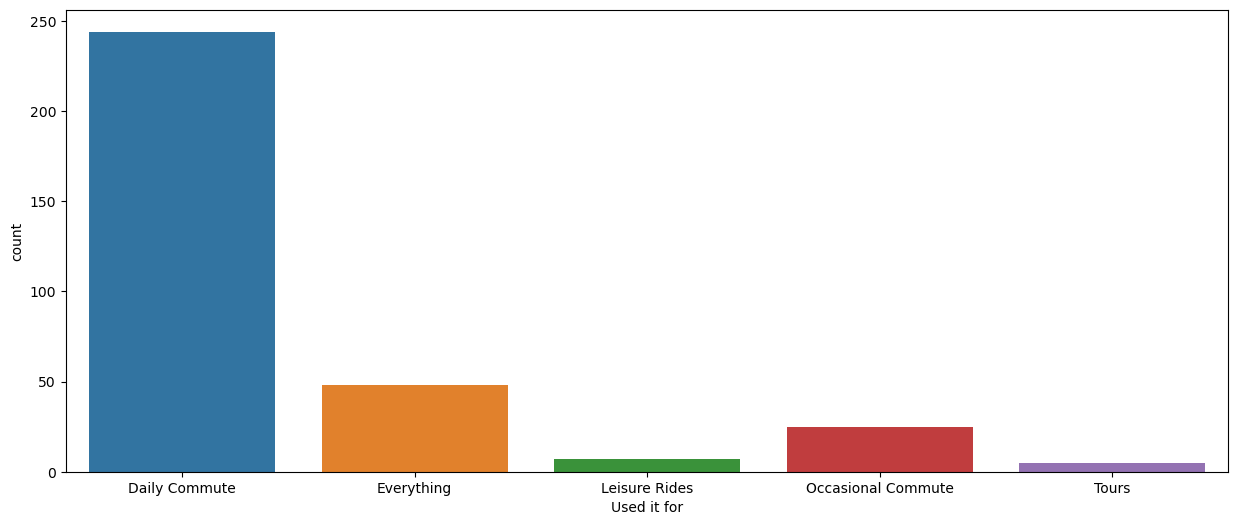

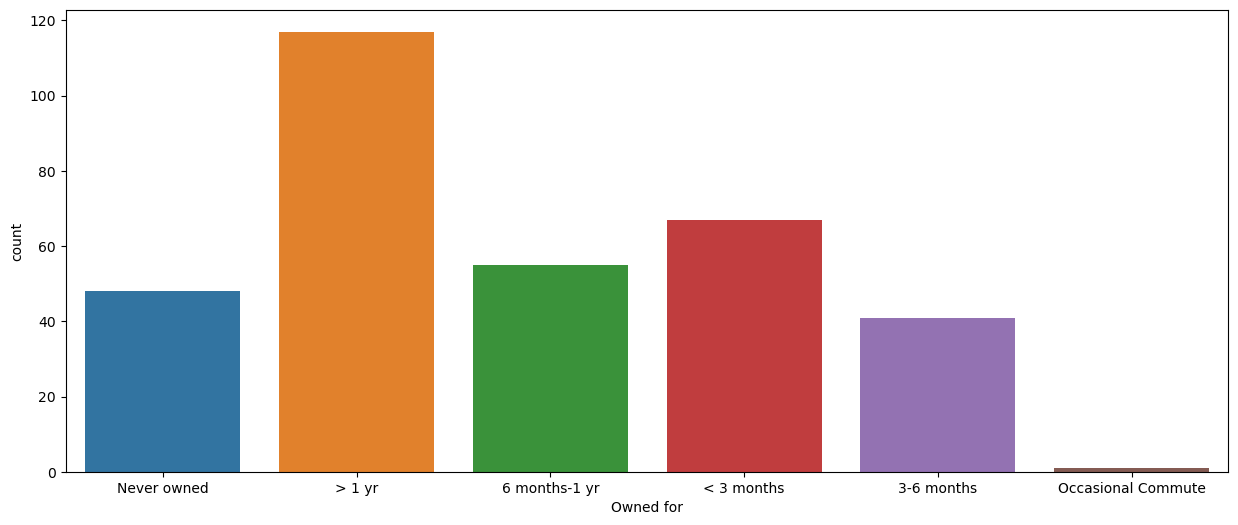

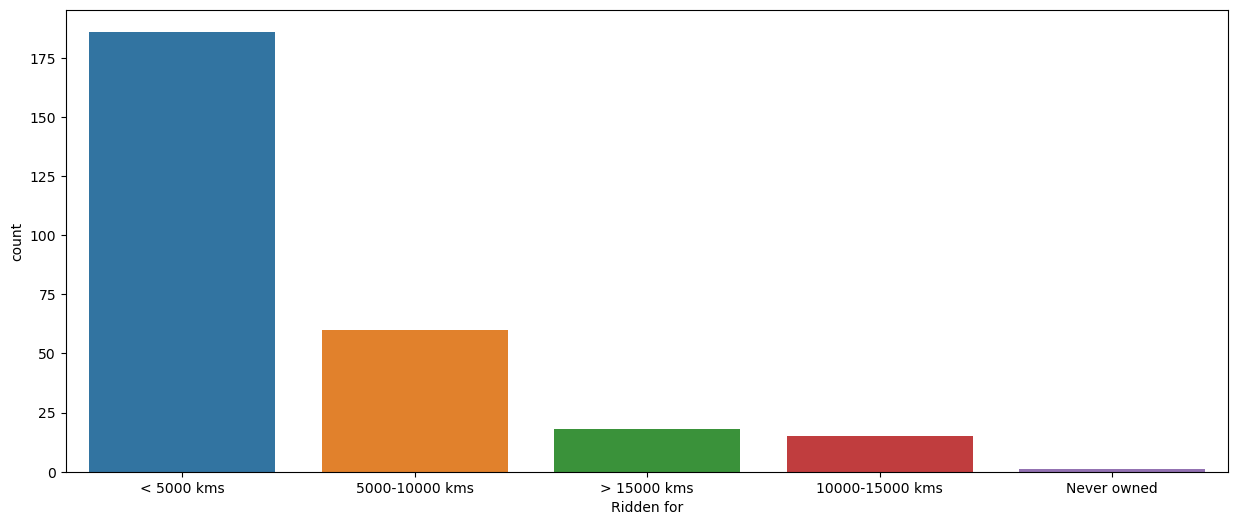

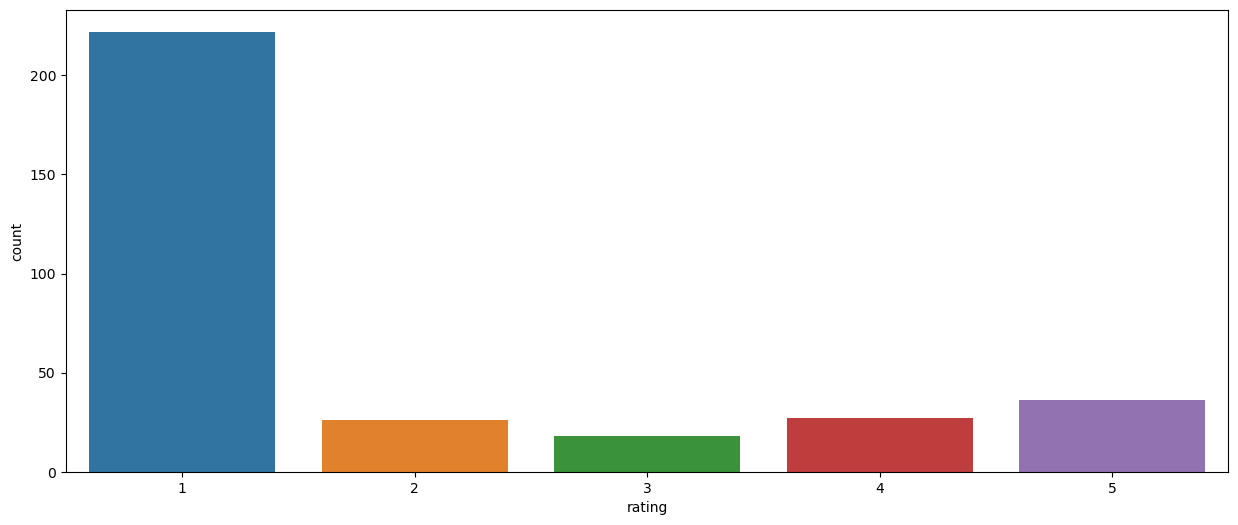

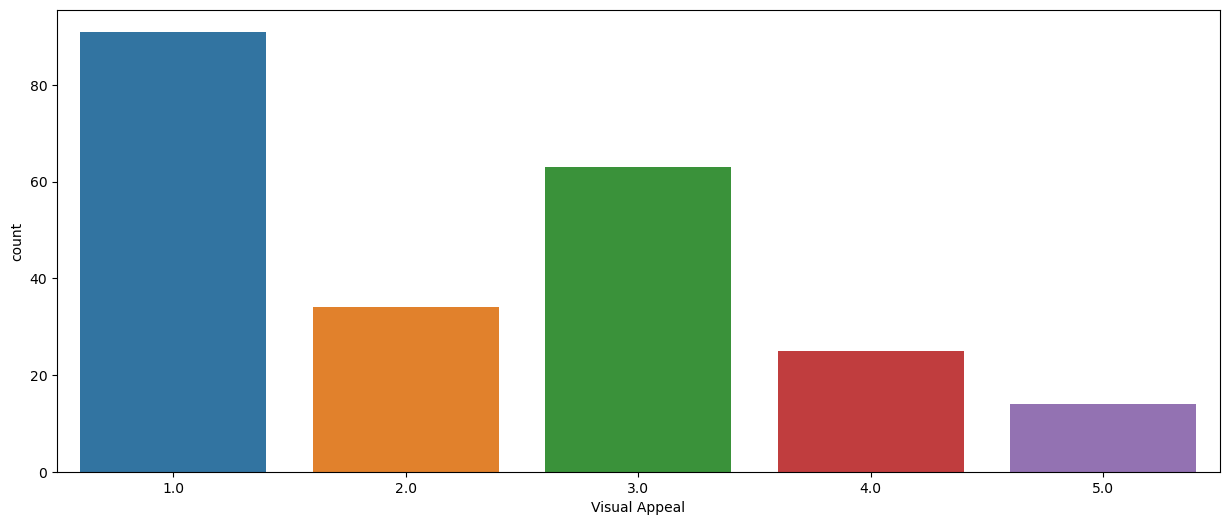

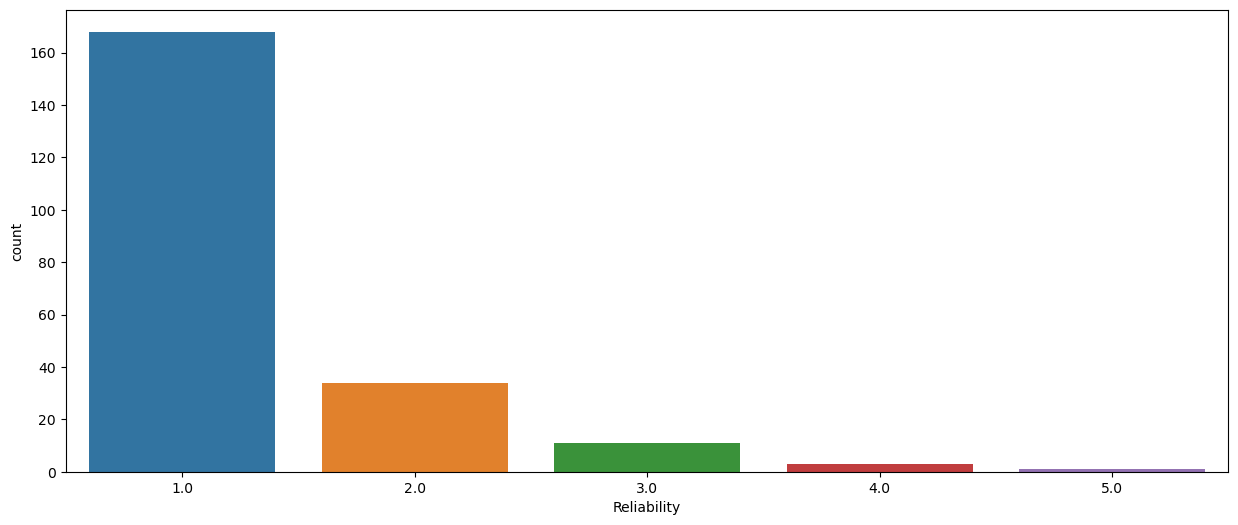

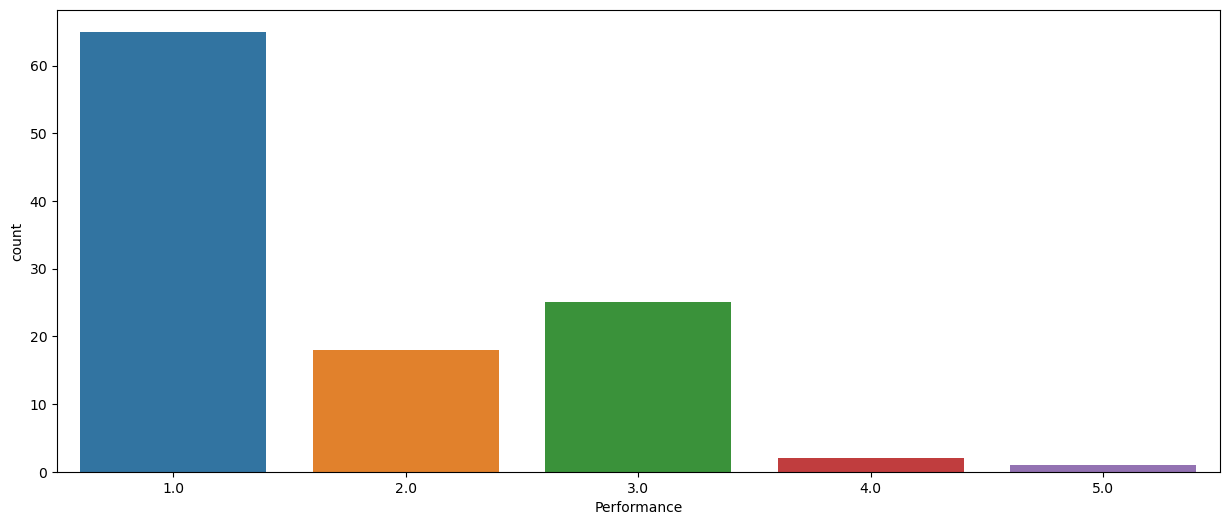

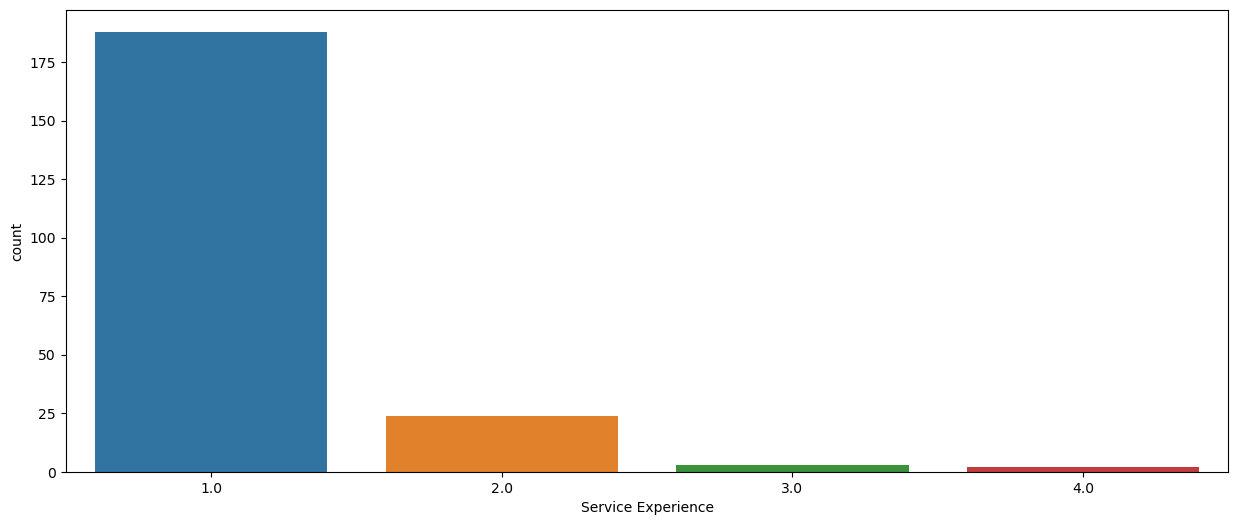

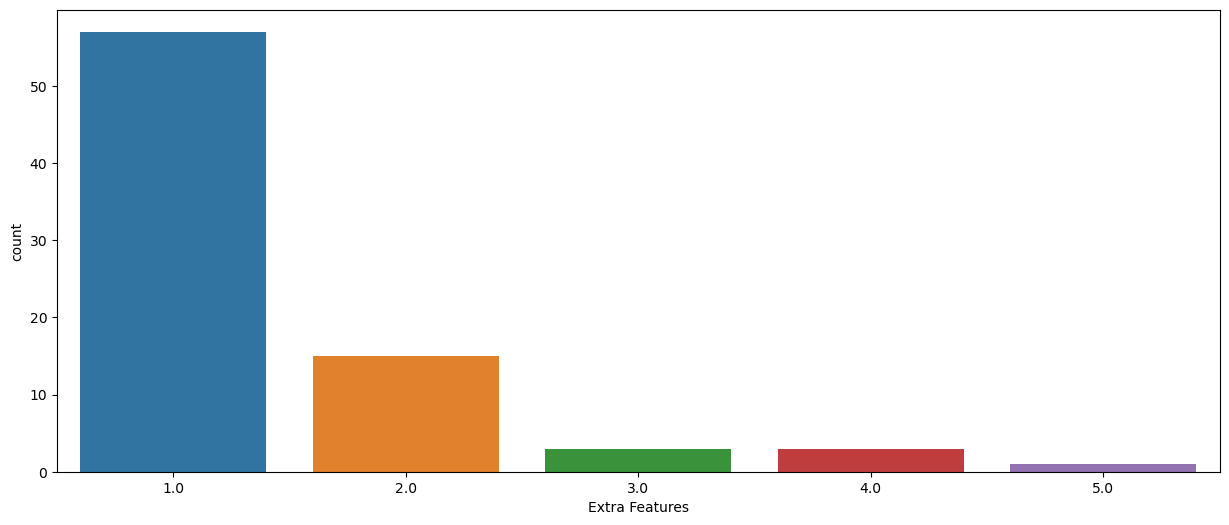

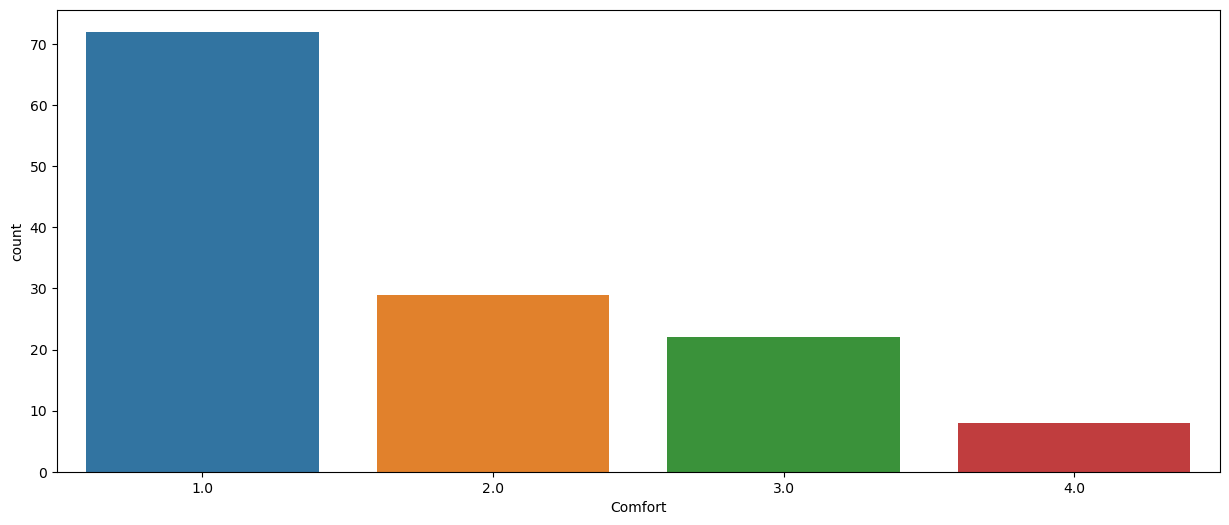

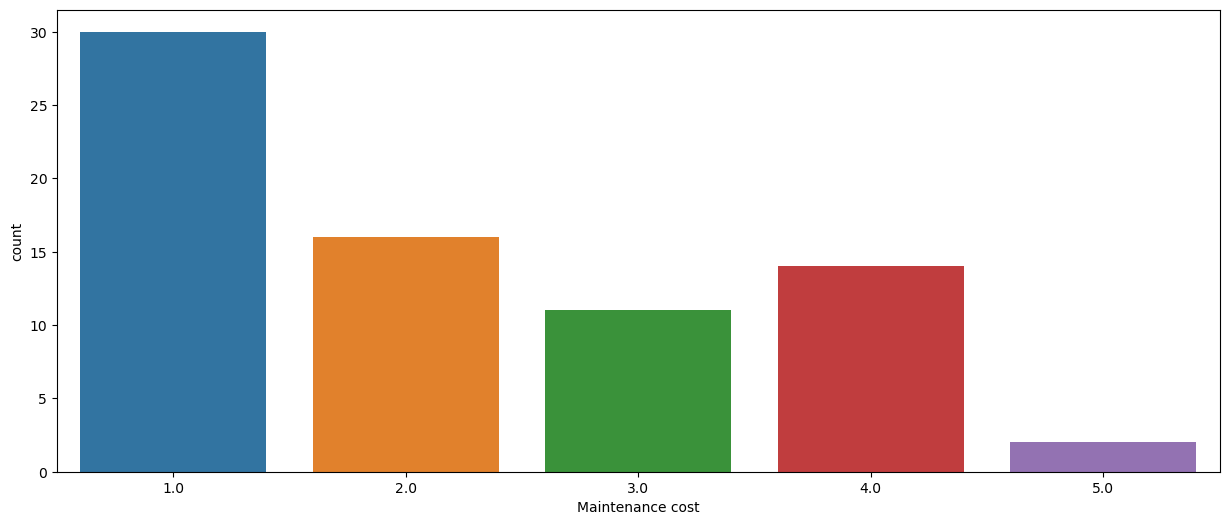

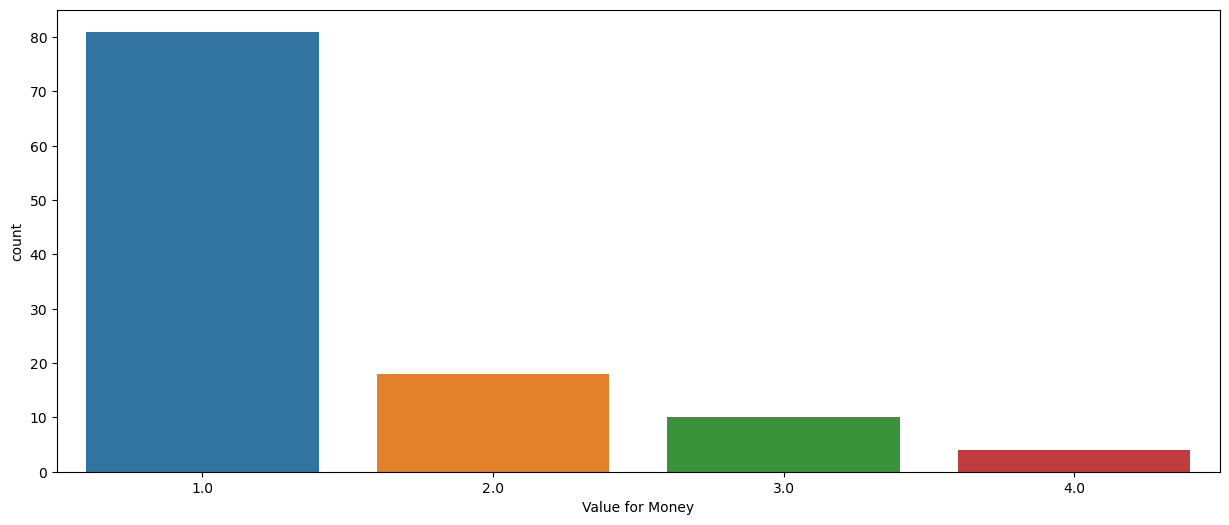

In [ ]:
for col in columns:
    plt.figure(figsize=(15, 6))
    sns.countplot(df[df['KmeansLabels'] == 1][col])
    plt.show(block=False)


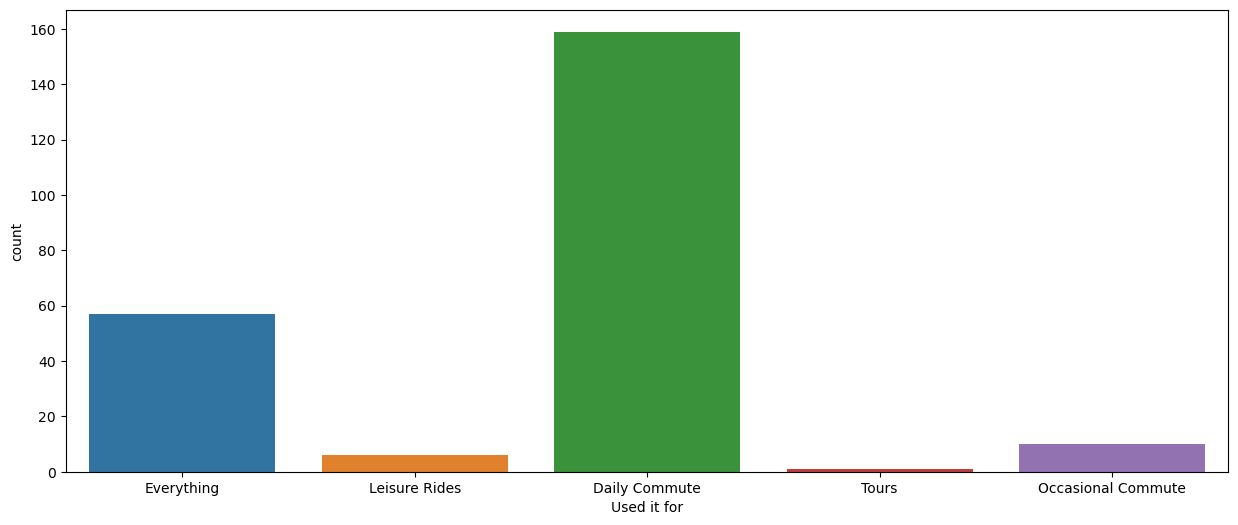

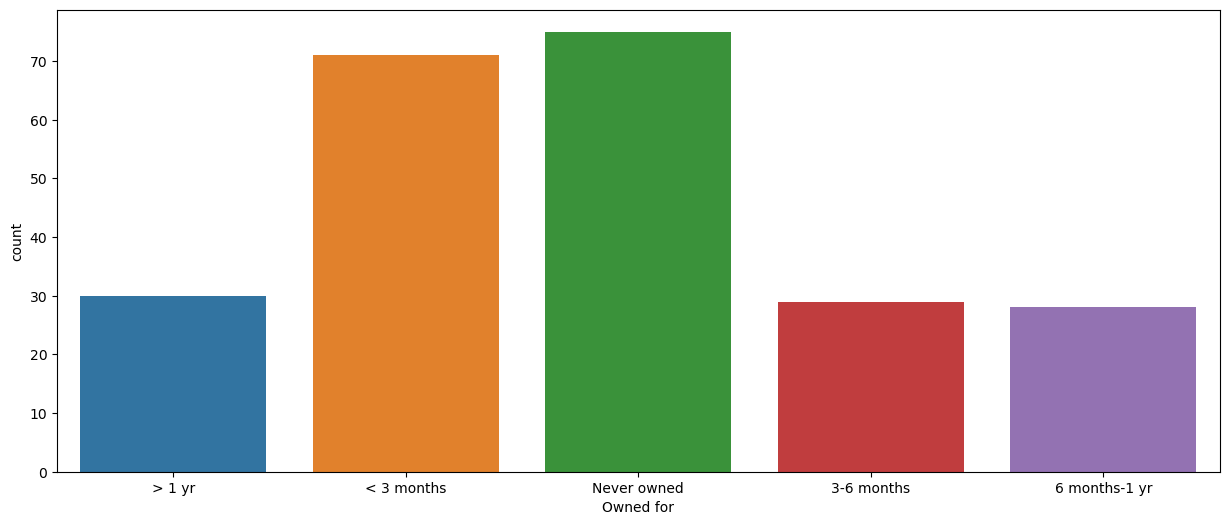

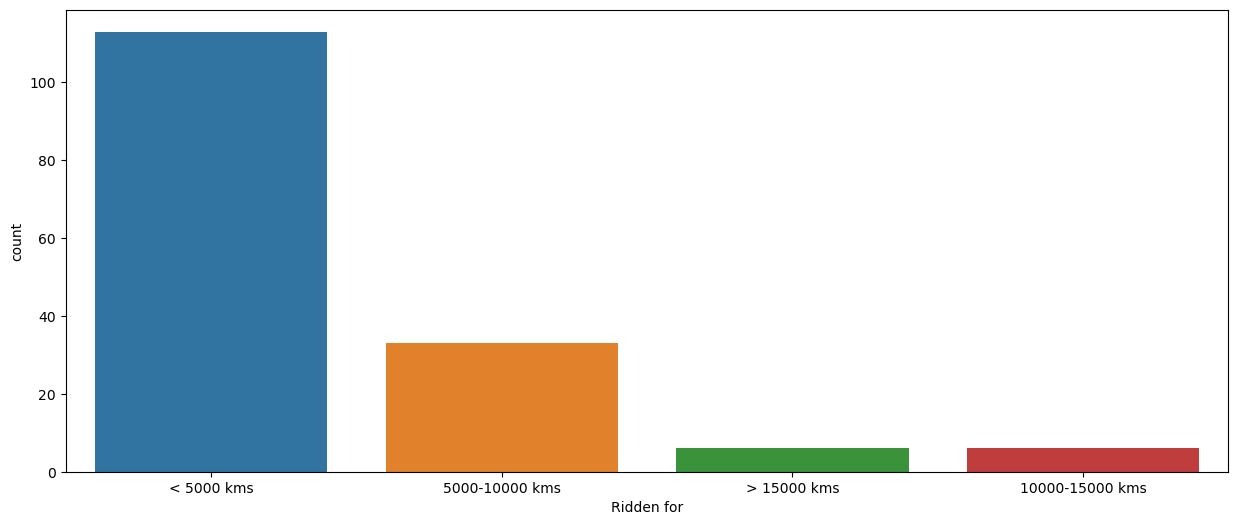

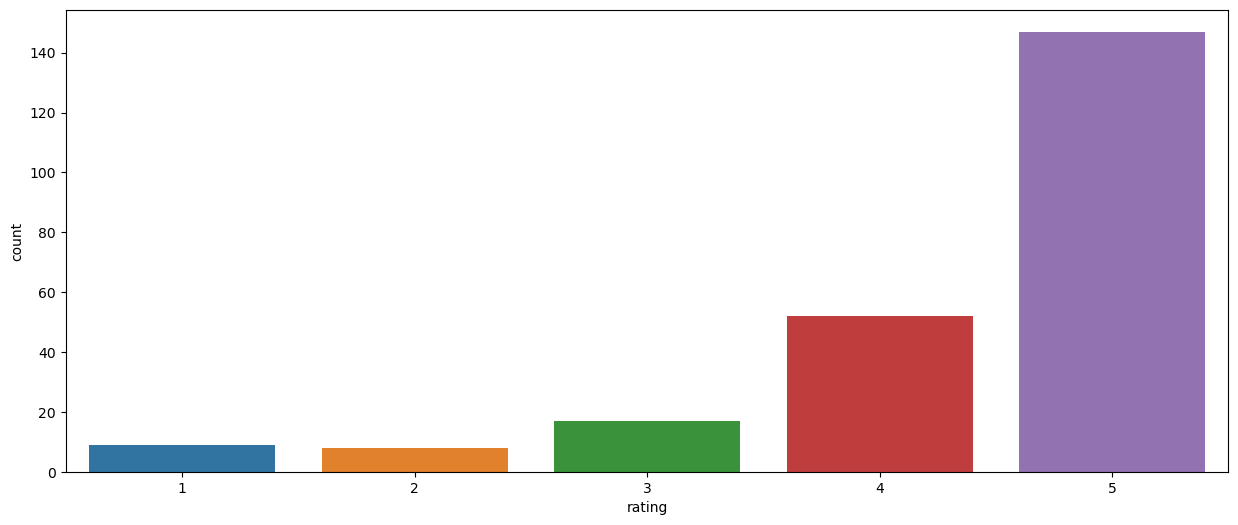

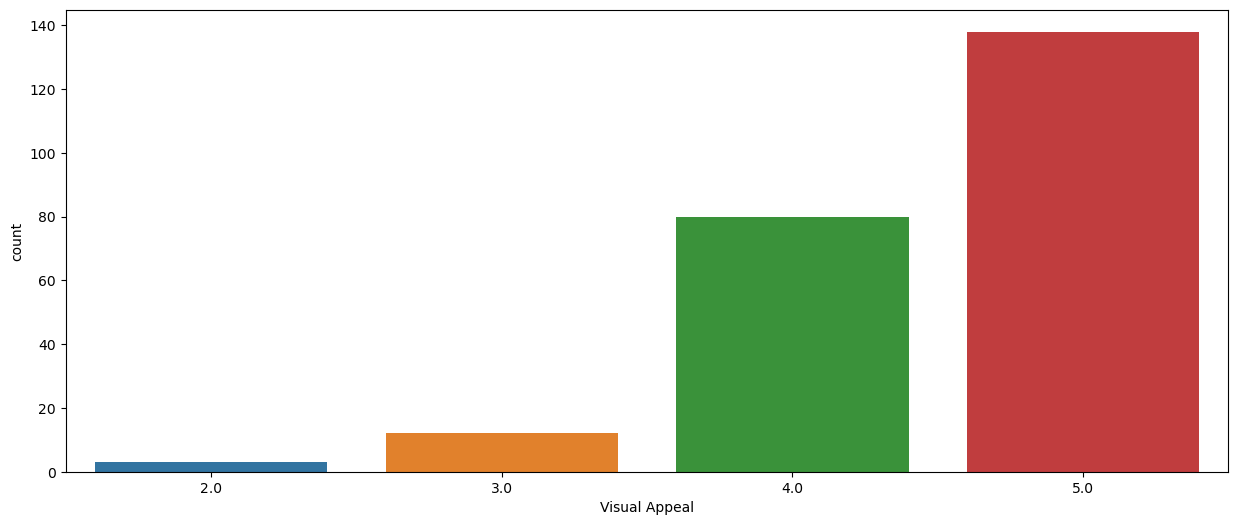

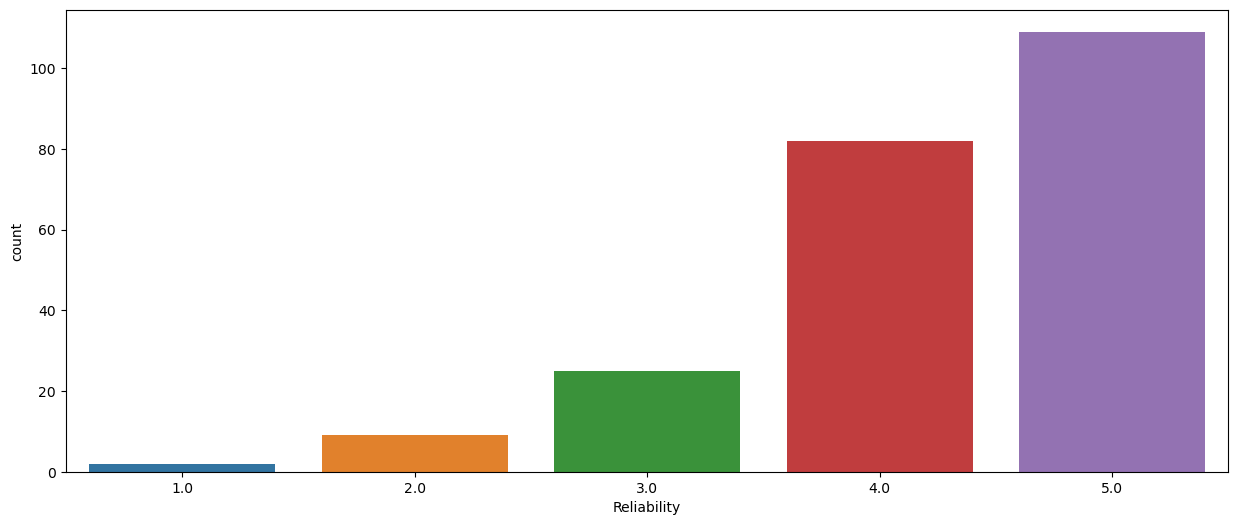

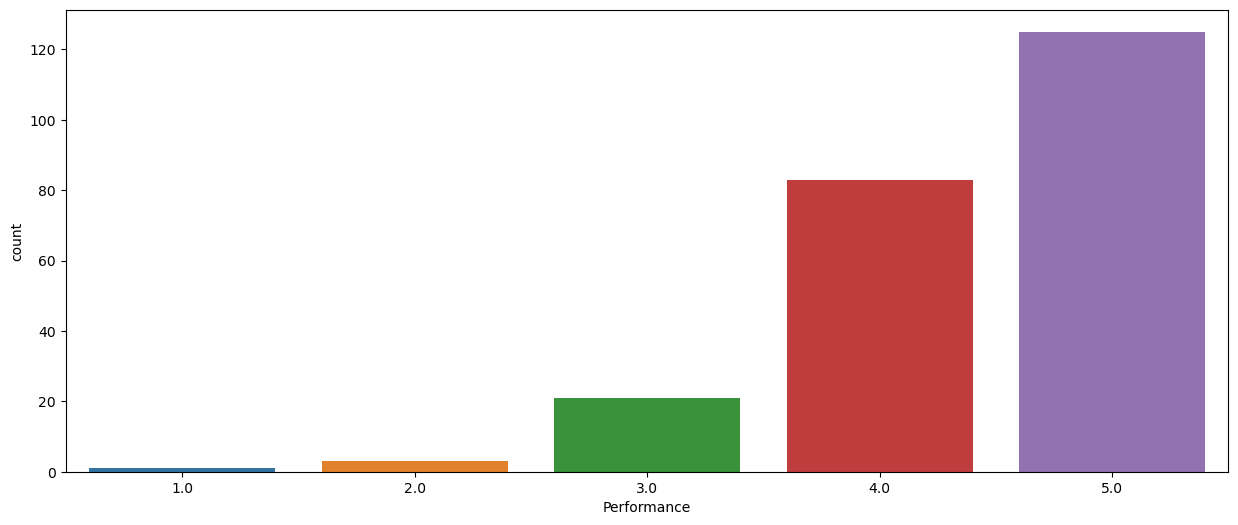

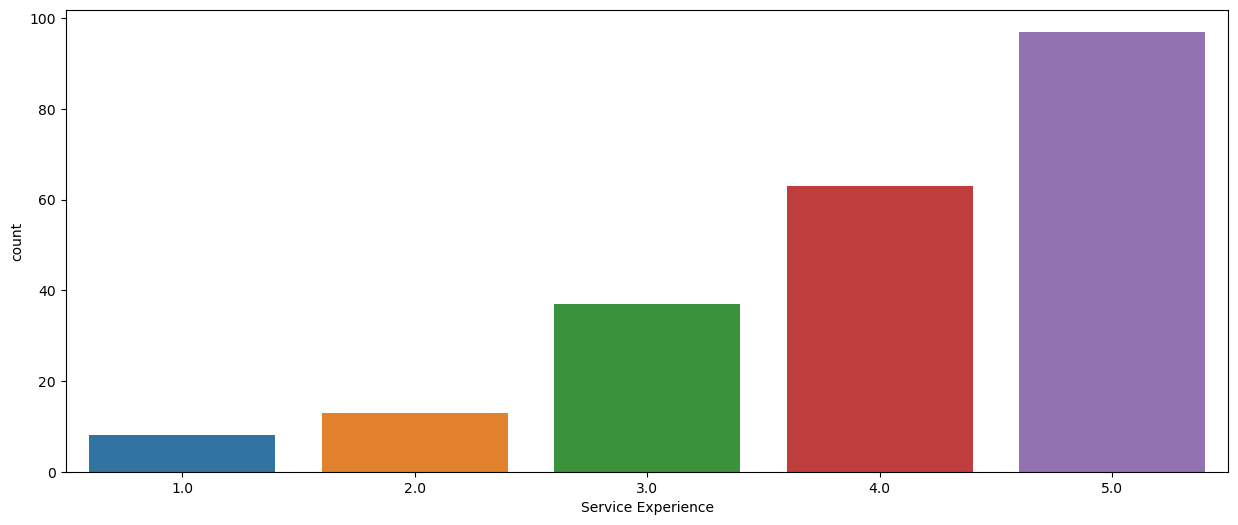

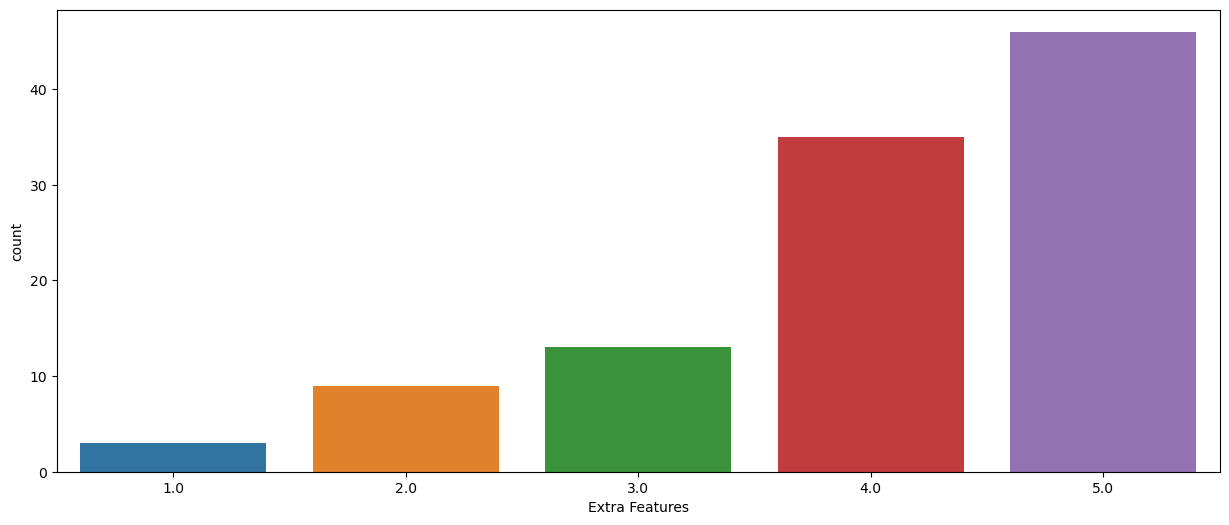

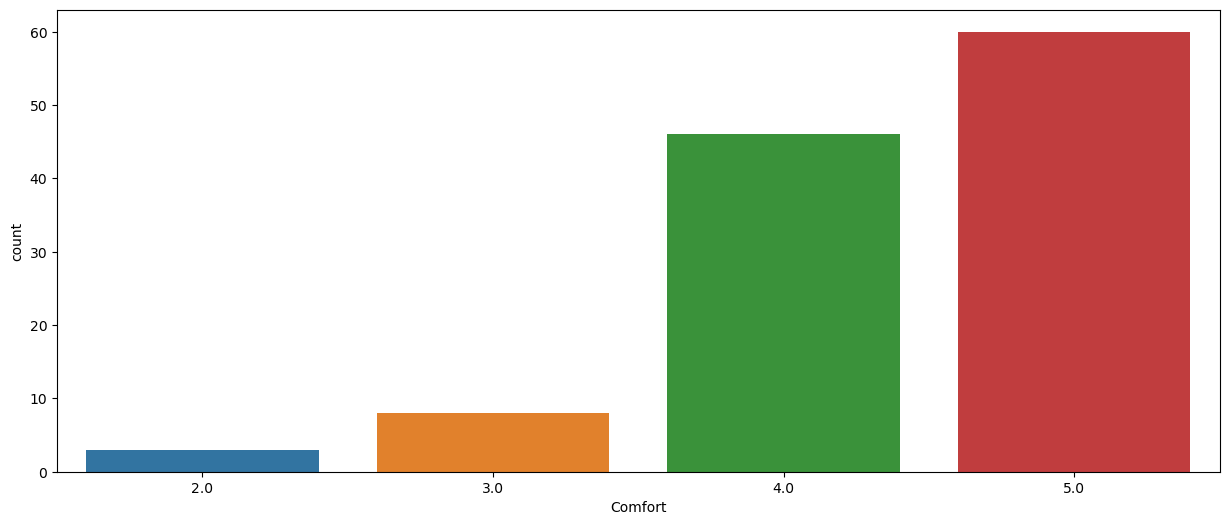

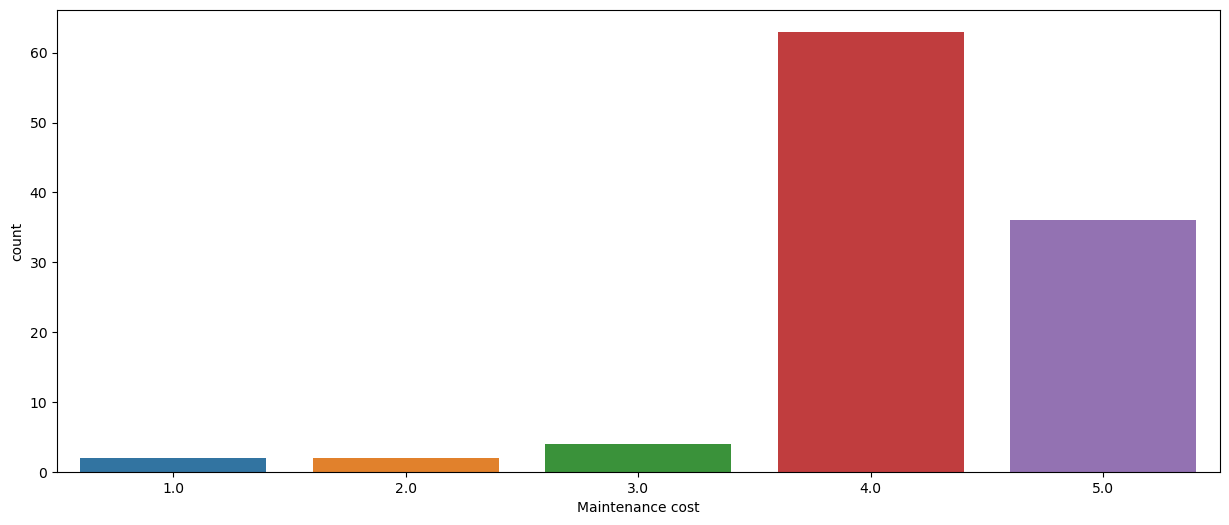

<Figure size 1500x600 with 0 Axes>

In [ ]:
for col in columns:
    try:
        plt.figure(figsize=(15, 6))
        sns.countplot(df[df['KmeansLabels'] == 2][col])
        plt.show(block=False)
    except:
        pass


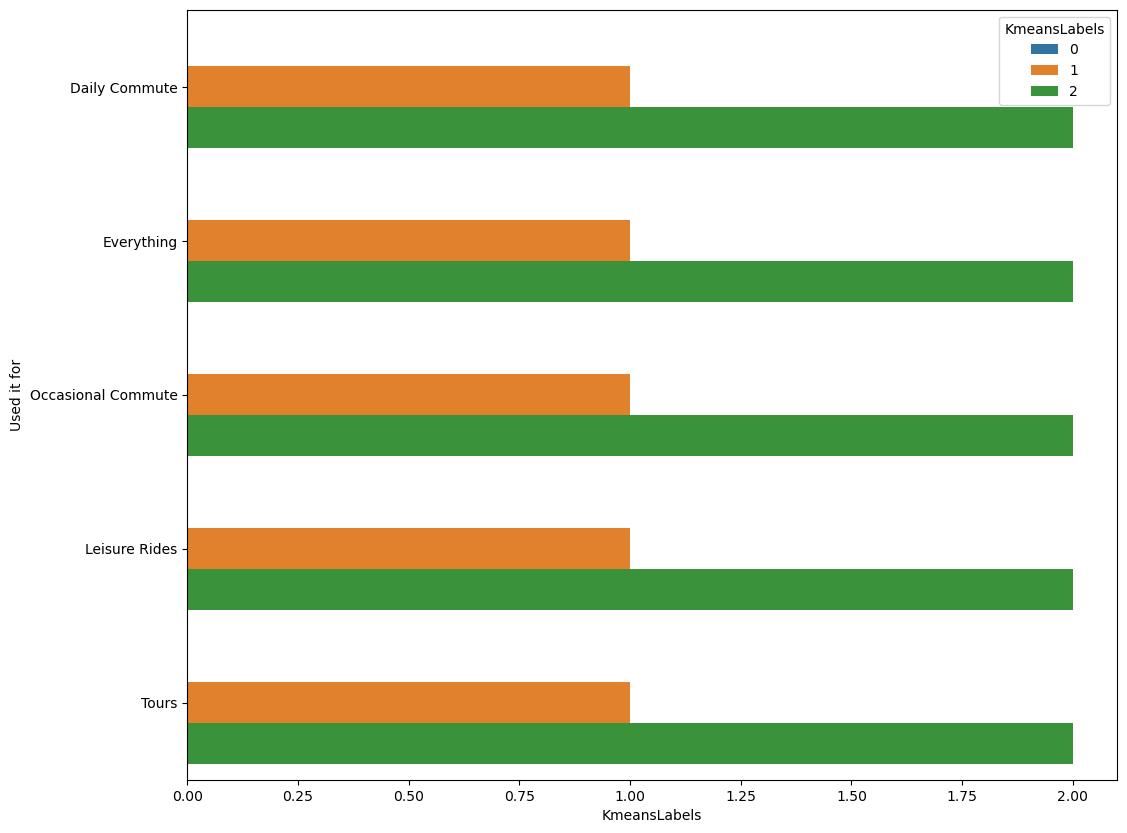

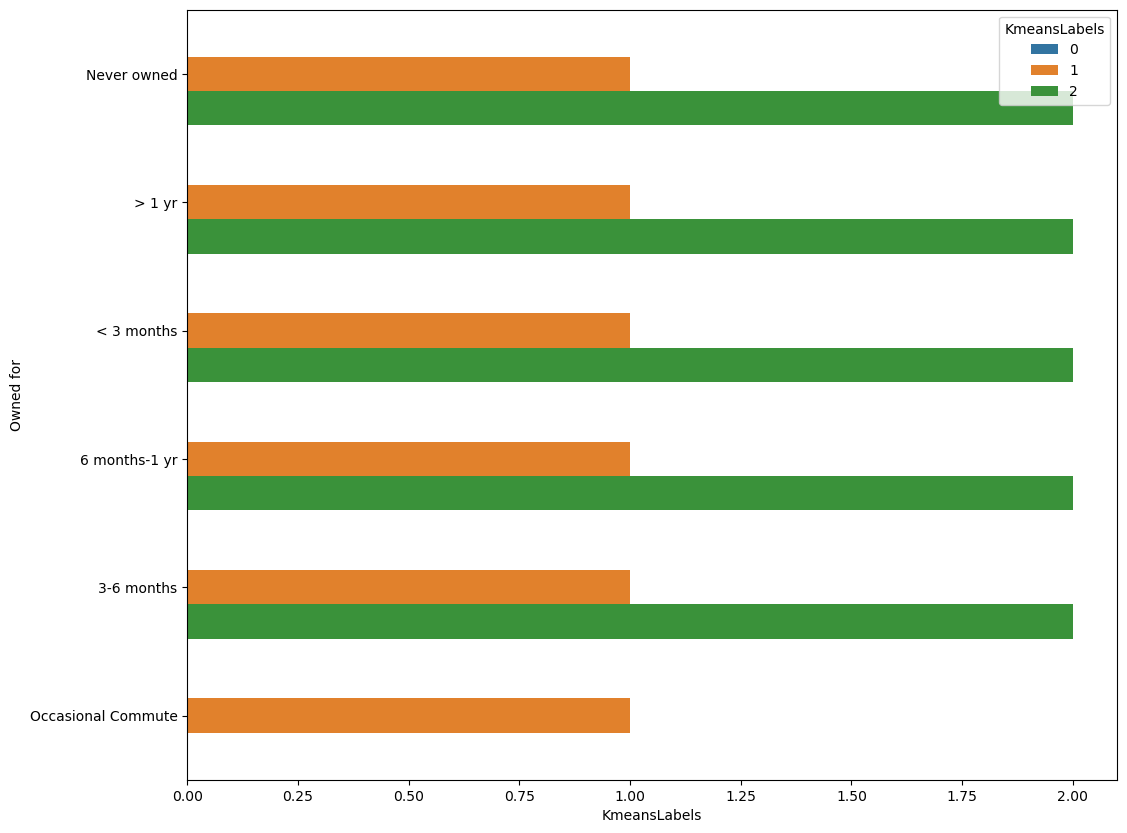

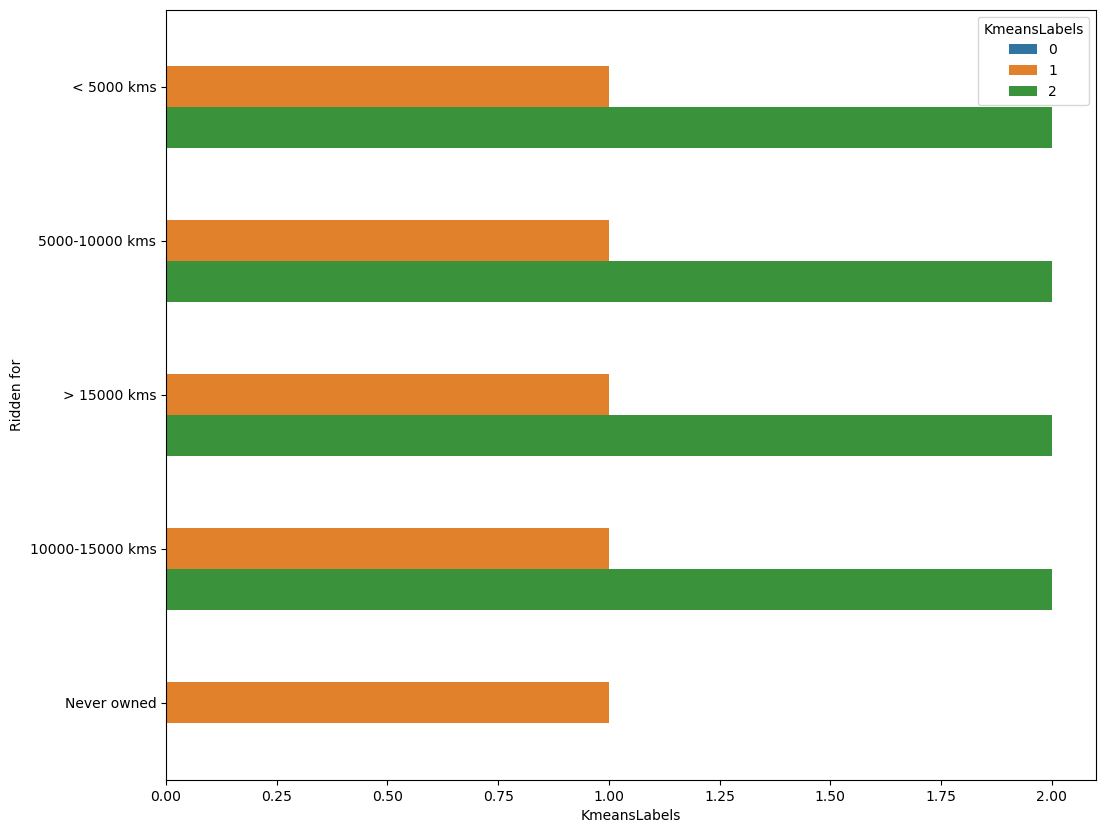

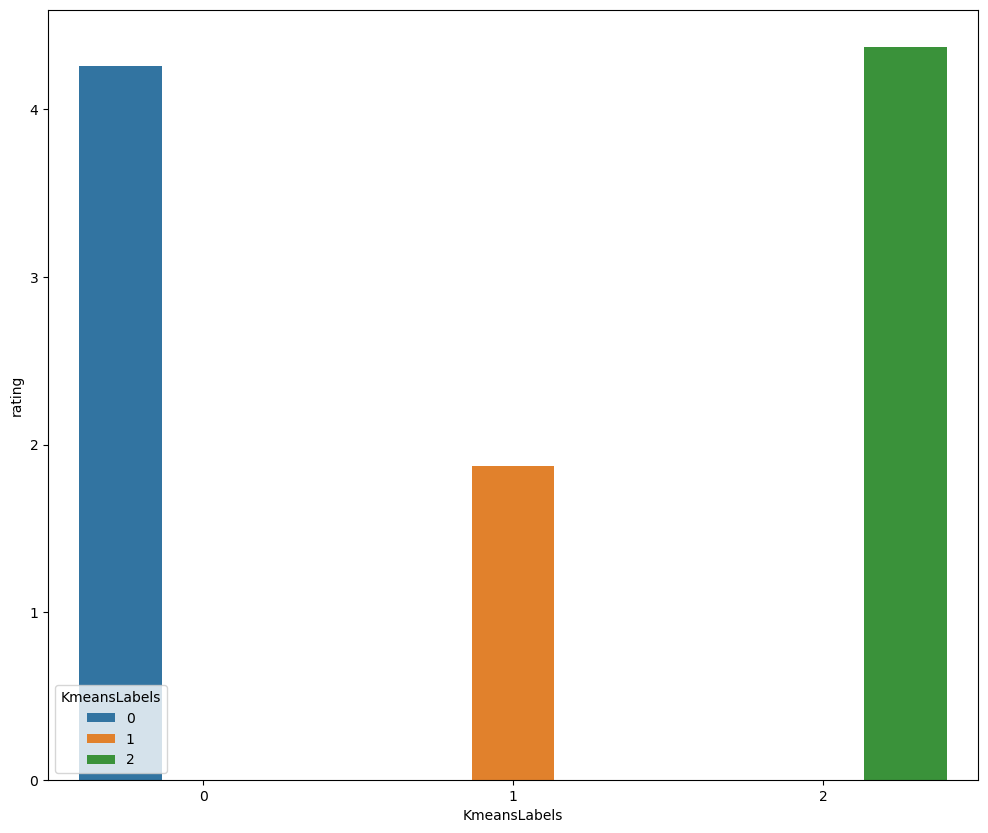

In [ ]:
plt.figure(figsize=(12, 10))
sns.barplot(x='KmeansLabels',y='Used it for',data=df, hue='KmeansLabels')
plt.show(block=False)

plt.figure(figsize=(12, 10))
sns.barplot(x='KmeansLabels',y='Owned for',data=df, hue='KmeansLabels')
plt.show(block=False)

plt.figure(figsize=(12, 10))
sns.barplot(x='KmeansLabels',y='Ridden for',data=df, hue='KmeansLabels')
plt.show(block=False)

plt.figure(figsize=(12, 10))
sns.barplot(x='KmeansLabels',y='rating',data=df, hue='KmeansLabels', ci=False)
plt.show(block=False)